Prvo smo dodali potrebne biblioteke.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,auc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


Skup podataka (engl. Dataset) je pronađen na Internetu (link: https://www.kaggle.com/ronitf/heart-disease-uci). Naziv skupa podataka je "heart.csv", a veličina mu je 11.33 kB. Uvezli smo na početku biblioteku "pandas" kako bi podatke spremili u varijablu "data".

In [ ]:
data = pd.read_csv("heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


U prethodnoj tablici se može vidjeti kako izgledaju prvih pet podataka. Vidimo da su podaci strukturirani u tablicu (pomoću redova i stupaca). Svaki red prikazuje jednu osobu sa njenim karakteristikama (karakteristika ima 14 tj. to su stupci tablice).  

In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


U prethodnoj tablici se može vidjeti kako izgledaju zadnjih pet podataka.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Prethodna naredba "data.info()" nam daje informacije o stupcima tablice. Pa tako npr. vidimo da je zadnji stupac "target" koji ima 303 non-null vrijednosti i da je dtype int64.

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.isnull().values.any()

False

Prethodne naredbe "data.isnull().sum()" i "data.isnull().values.any()" služe za provjeru da li ima null vrijednosti. Kao što vidimo iz dobivenih rezultata, nijedna null vrijednost nije pronađena. 

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Prethodnu naredbu "data.describe()" smo koristili za pronaći vrijednosti poput: count, mean, std,... za svaku kategoriju podataka tj. za svaki stupac tablice. 

In [ ]:
data.shape

(303, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Naredbu "data.shape" smo koristili za ispis veličine podataka (vidimo da ima 303 redaka i 14 stupaca), a naredbu "data.columns" za ispis naziva stupaca iz tablice.  

In [ ]:
data.sample(frac =0.25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


Naredba sample(frac=0.25) služi da dobijemo slučajno odabrane retke iz dataframea

Sljedeći dio koda prikazuje razdvajanje podataka u dva niza...imamo varijable koje možemo okarakterizirati kao kategoričke i kontinuirane.

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

Vidimo da su kategoričke varijable spol,vrsta boli u prsima,šećer u krvi,krvni tlak u mirovanju, angina pectoris uzrokovana vježbanjem, nagib ST segmenta, broj velikih žila, količina hemoglobina (za bolest thalsemiju) i target varijala

In [ ]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Kontinuirane varijable su godine, tlak u mirovanju, kolesterol, najveći broj otkucaja, St segment prilikom vježbanja u odnosu na mirovanje

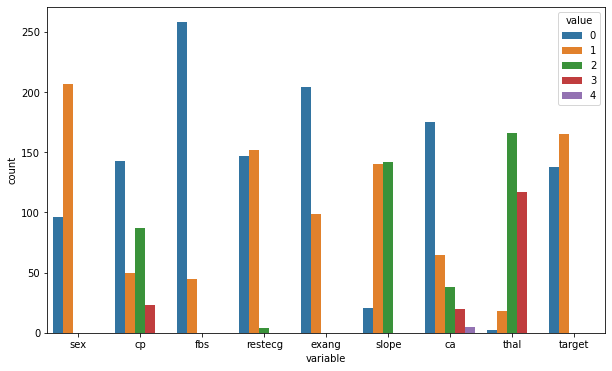

In [ ]:
plt.figure(figsize=(10,6))
dataframe_categorical = data.loc[:,['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
sns.countplot(x="variable", hue="value",data= pd.melt(dataframe_categorical));


Graf prikazuje odnos kategoričkih varijabli i njihovu podjelu, te koliko ih ima. Value u legendi sadrži brojeve od 0-4,koliko imamo i podjela unutar samih kategoričkih varijabli. Vidimo da  varijabla spol - sex ima dvije varijable(muško,žensko), cp-odnosno vrsta boli u prsima četiri,šećer u krvi dvije varijable,krvni tlak u mirovanju tri, angina pectoris uzrokovana vježbanjem dvijer, nagib ST segmenta tri, broj velikih žila pet, količina hemoglobina četiri (za bolest thalsemiju) i target varijala (ima bolest ili nema) dvije

sex=[1 = male, 0 = female]
chest pain type =[0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic]
Fasting Blood Sugar=[1 = true, 0 = false]
Resting Electrocardiographic=[0 = Normal, 1 = Non-Normal, 2 = Risk]
Exercise induced Angina =[1 = yes; 0 = no]
Peak Exercise=[0= better heart rate with excercise 1=typical healthy heart, 2=signs of unhealthy heart]


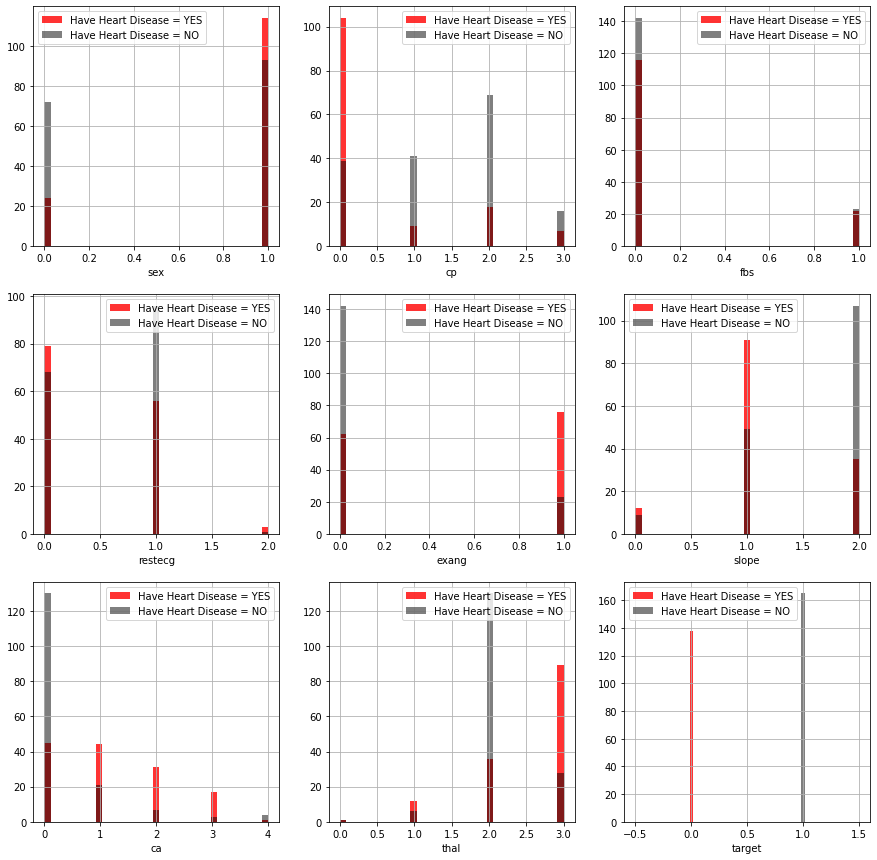

In [ ]:
plt.figure(figsize=(15, 15))
print ("sex=[1 = male, 0 = female]")
print ("chest pain type =[0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic]")
print ("Fasting Blood Sugar=[1 = true, 0 = false]")
print ("Resting Electrocardiographic=[0 = Normal, 1 = Non-Normal, 2 = Risk]")
print ("Exercise induced Angina =[1 = yes; 0 = no]")
print ("Peak Exercise=[0= better heart rate with excercise 1=typical healthy heart, 2=signs of unhealthy heart]")

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='Red', label='Have Heart Disease = YES', alpha=.8)
    data[data["target"] == 1][column].hist(bins=35, color='Black', label='Have Heart Disease = NO', alpha=.5)
    plt.legend()
    plt.xlabel(column)

Graf prikazuje odnos vrijednosti kategoričkih varijabli u odnosu na ljude koji imaju bolest ili nemaju.

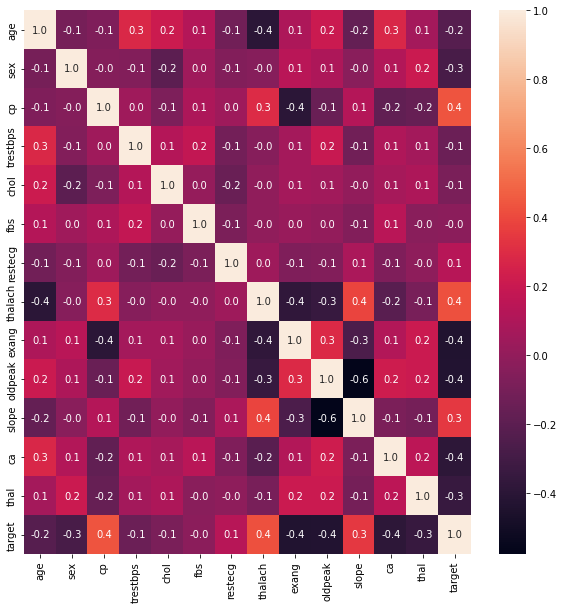

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

Kod heatmape možemo vidjeti koje značajke su povezane i u kakvoj su korelaciji(vrijednosti). Ukoliko je vrijednost negativna znači da povećanje jedne utječe na smanjenje vrijednosti druge značajke, a ako je korelacija visoka i pozitivna povećanjem jedne vrijednosti povećava se i druga značajka. Vidimo da je najbolja pozitivna korelacija između maksimalnog postignutog broja otkucaja srca(talach) i tipa boli u prsima(cp). Najjače negativne korelacije su između target varijable(ima bolest srca ili nema) i angine izazvane vježbanjem(exang) i ST segmenta uslijed vjeržbanja (oldpeak).

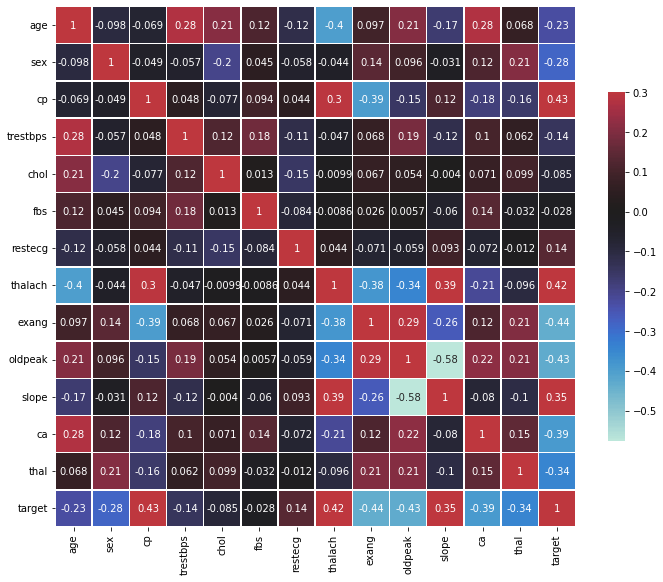

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

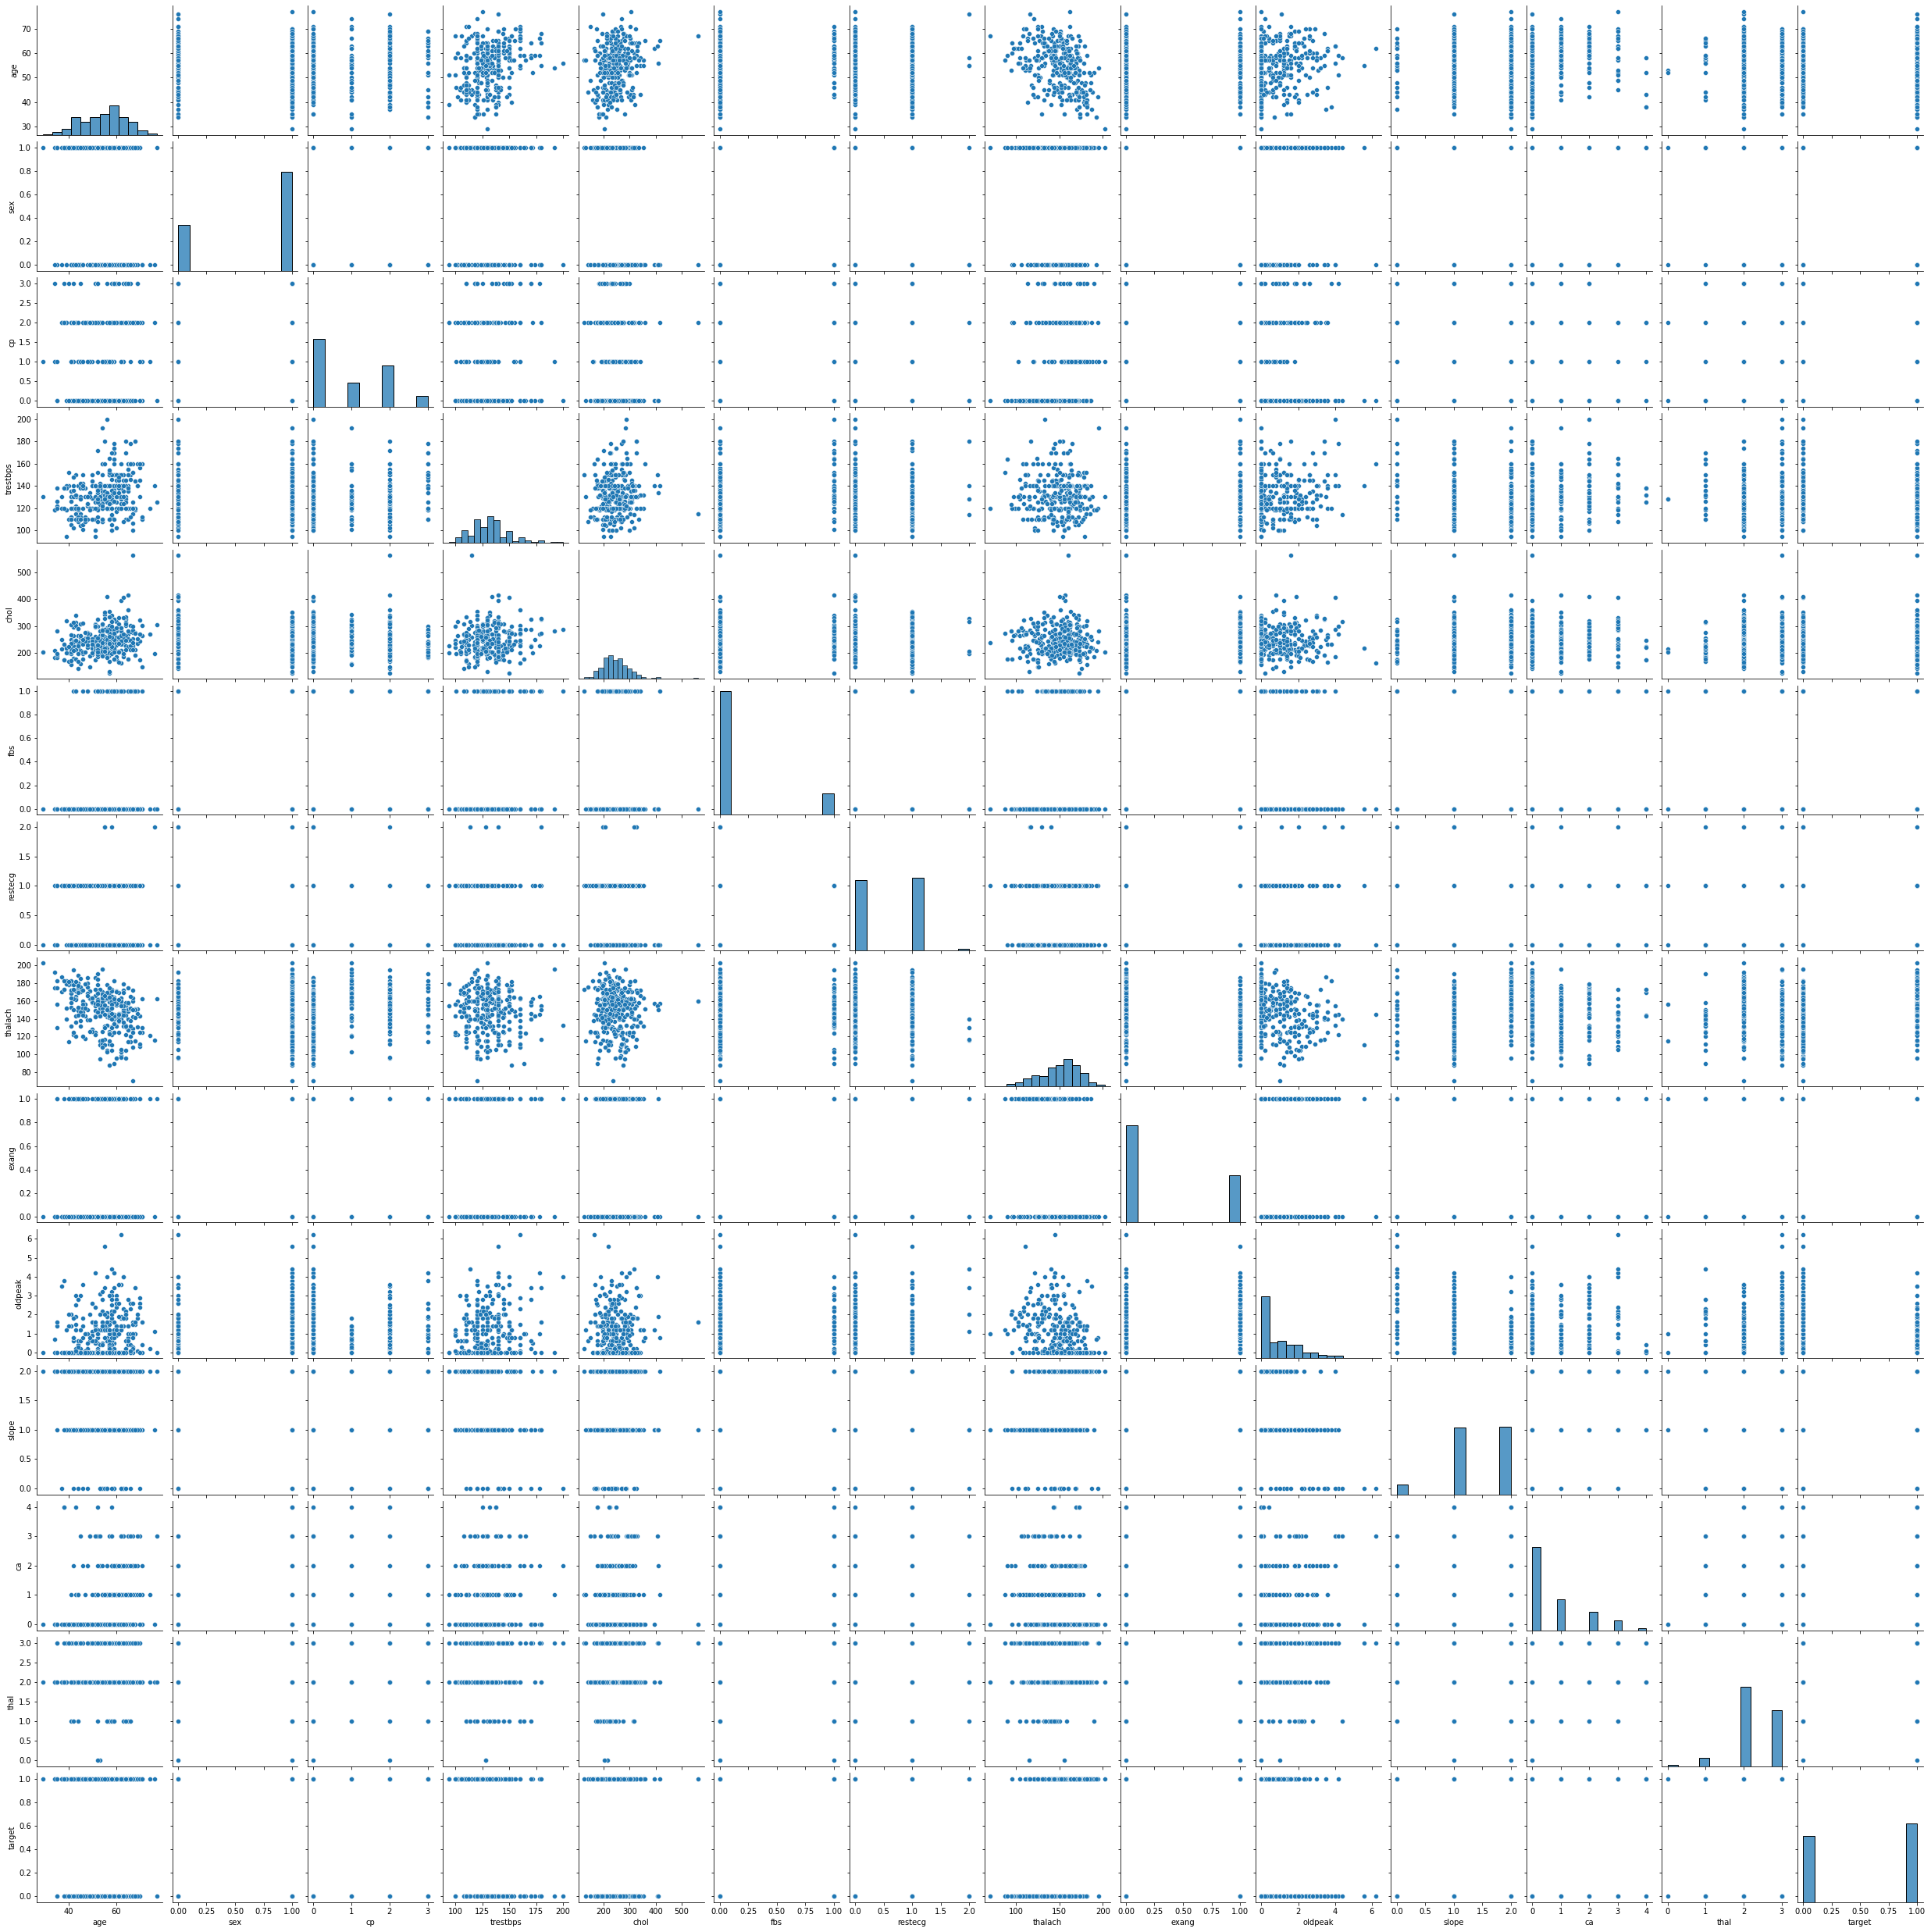

In [ ]:
sns.pairplot(data)
plt.show()

Ovaj graf prikazuje sve međusobne povezanosti i vizualizaciju podataka svih značajki po parovima. Ova funkcija swtvara mrežu osi tako da se svaka numerička varijabla u podacima dijeli preko y-osi u jednom retku i x-osi u jednom stupcu. Dijagonalni graqfikoni crtaju jednovarijantnu distribuciju kojaq prikazuje rubnu distribuciju podataka u svakom stupcu.

In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Prethodnom naredbom "data['target'].value_counts()" smo odvojili one ljude koji imaju bolesti srca od onih koji nemaju. Iz dobivenih rezultata vidimo da ima 165 (od ukupno 303) onih koji imaju bolesti srca, a 138 onih koji nemaju bolesti srca.

In [ ]:
data['target'].value_counts()/data.shape[0]*100

1    54.455446
0    45.544554
Name: target, dtype: float64

Prethodnom narednom "data['target'].value_counts()/data.shape[0]*100" smo dobili postotak ljudi koji imaju bolesti srca (njih 54.455446%) i postotak onih koji nemaju bolesti srca (njih 45.544554%).

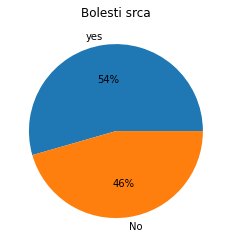

In [ ]:
labels = ['yes', 'No']
values = data['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Bolesti srca')
plt.show()

Postotak ljudi koji imaju i nemaju bolesti srca (prethodno izračunatih) smo prikazali s kružnim grafom.  

In [ ]:
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

Prethodnom naredbom "data.age.value_counts()" smo dobili broj ljudi sa određenim brojem godina. Npr. vidimo da ima 19 ljudi koji imaju 58 godina.

Idućim kodom je prikazan plot distribucije godina.  

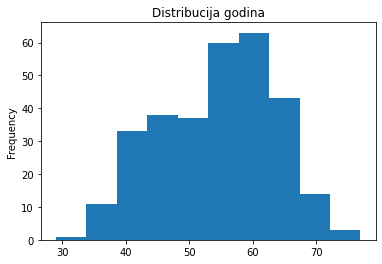

In [ ]:
data['age'].plot(kind = 'hist', title = 'Distribucija godina')
plt.show()

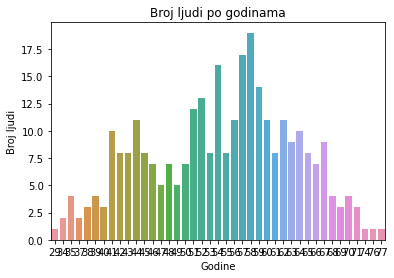

In [ ]:
sns.barplot(x=data.age.value_counts().index,y=data.age.value_counts().values )
plt.xlabel('Godine')
plt.ylabel('Broj ljudi')
plt.title('Broj ljudi po godinama')
plt.show()

Prethodnim plot-om smo prikazali odnos godina i broja ljudi koji imaju te godine.

Idući kod smo koristili za pronaći: najmlađu osobu tj. najmanji broj godina, najstariju osobu tj. najveći broj godina i srednju vrijednost svih godina. 

In [ ]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Osoba sa najmanjim godinama :',minAge)
print('Osoba sa najvećim godinama :',maxAge)
print('Mean godine :',round(meanAge,2))

Osoba sa najmanjim godinama : 29
Osoba sa najvećim godinama : 77
Mean godine : 54.37


Idući kod smo koristili za podijeliti osobe prema njihovoj starosti na: mlade, osobe srednje životne dobi i na osobe starije životne dobi. Mlade osobe su nam osobe koje imaju od 29 godina (uključujući 29 godina) do 39 godina (uključujući 39 godina), osobe srednje životne dobi su nam osobe od 40 godina (uključujući 40 godina) do 54 (uključujći 54 godina) godina, a osobe starije životne dobi su nam osobe od 55 godina (uključujući 55 godina) pa nadalje. Iz dobivenih rezultata se može vidjeti da mladih ima 16, osoba srednje životne dobi 128, a osoba starije životne dobi 159. Napomena: kada se zbroje mladi, srednje dobi i starije dobi dobije se 303 što je ukupan broj redaka u tablici podataka. 

In [ ]:
young=data[(data.age>=29)&(data.age<40)]
middle=data[(data.age>=40)&(data.age<55)]
elderly=data[(data.age>=55)]
print('Mladi :',len(young))
print('Osobe srednje životne dobi :',len(middle))
print('Osobe starije životne dobi :',len(elderly))

Mladi : 16
Osobe srednje životne dobi : 128
Osobe starije životne dobi : 159


Idućim plot-om smo prikazali raspored ljudi po dobnim skupinama.

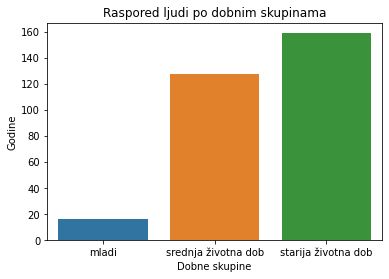

In [ ]:
sns.barplot(x=['mladi','srednja životna dob','starija životna dob'],y=[len(young),len(middle),len(elderly)])
plt.xlabel('Dobne skupine')
plt.ylabel('Godine')
plt.title('Raspored ljudi po dobnim skupinama')
plt.show()

In [ ]:
data["sex"]

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

Prethodnom narednom "data["sex"]" smo ispisali stupac "sex" za sve podatke.

In [ ]:
for element in data["sex"]:
  if(element==0):
    data["Spol"]=data.sex.replace(0,'Žensko')

In [ ]:
data["Spol"]=data.Spol.replace(1,'Muško')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Spol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Muško
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Muško
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Žensko
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Muško
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Žensko


Prethodnim naredbama smo vrijednost 0 u stupcu "sex" zamijenili s vrijednosti "Žensko", a vrijednost 1 smo zamijenili s vrijednosti "Muško". Također, sami naziv stupca smo postavili na "Spol". Nakon izvršenih zamjena smo prikazali tablicu s prvih 5 podataka da se uvjerimo da su zamjene uspješno obavljene.

In [ ]:
data['AgeRange']=0
young_index=data[(data.age>=29)&(data.age<40)].index
middle_index=data[(data.age>=40)&(data.age<55)].index
elderly_index=data[(data.age>55)].index

for index in elderly_index:
    data.loc[index,'AgeRange']=2
    
for index in middle_index:
    data.loc[index,'AgeRange']=1

for index in young_index:
    data.loc[index,'AgeRange']=0

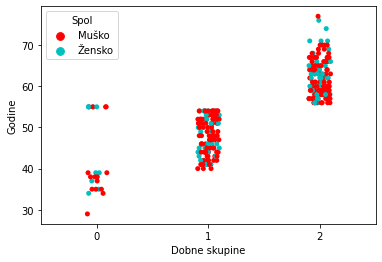

In [ ]:
sns.stripplot(x="AgeRange", y="age",hue='Spol',
              palette=["r", "c", "y"], data=data)
plt.xlabel("Dobne skupine")
plt.ylabel("Godine")
plt.show()

Prethodne naredbe su korištene za podjelu dobnih skupina na indexe (0,1 i 2) te za crtanje plot-a koji prikazuje podjelu ljudi prema: indexima dobne skupine, godinama i spolovima.

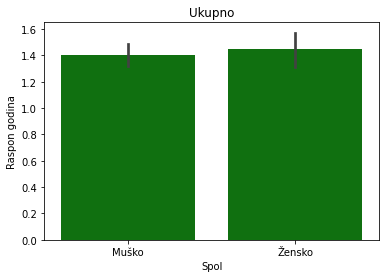

In [ ]:
sns.set_color_codes("pastel")
sns.barplot(y="AgeRange", x="Spol", data=data,
            label="Ukupno", color="green")
plt.title("Ukupno")
plt.ylabel("Raspon godina")
plt.show()

Prethodnim plot-om je prikazan odnos između spolova i raspona godina i može se vidjeti da su žene malo starije.

In [ ]:
elderly["sex"]=elderly.sex.replace(0,'Žensko')
elderly["sex"]=elderly.sex.replace(1,'Muško')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


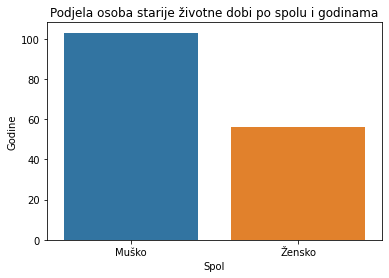

In [ ]:
sns.countplot(elderly.sex)
plt.title("Podjela osoba starije životne dobi po spolu i godinama")
plt.xlabel("Spol")
plt.ylabel("Godine")
plt.show()

In [ ]:
print("Ljudi za koje je zabilježen najveći broj otkucaja srca")
elderly.groupby(elderly['sex'])['thalach'].agg('count')

Ljudi za koje je zabilježen najveći broj otkucaja srca


sex
Muško     103
Žensko     56
Name: thalach, dtype: int64

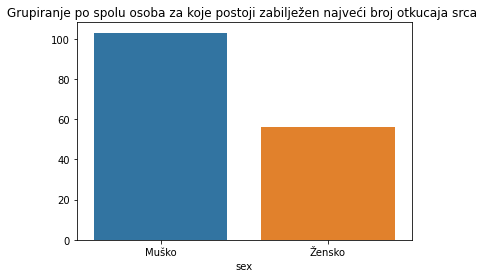

In [ ]:
sns.barplot(x=elderly.groupby(elderly['sex'])['thalach'].agg('count').index,y=elderly.groupby(elderly['sex'])['thalach'].agg('count').values)
plt.title("Grupiranje po spolu osoba za koje postoji zabilježen najveći broj otkucaja srca ")
plt.show()

In [ ]:
print("Ljudi za koje je zabilježen najveći broj otkucaja srca - suma svih najvećih otkucaja")
elderly.groupby(elderly['sex'])['thalach'].agg('sum')

Ljudi za koje je zabilježen najveći broj otkucaja srca - suma svih najvećih otkucaja


sex
Muško     14491
Žensko     8152
Name: thalach, dtype: int64

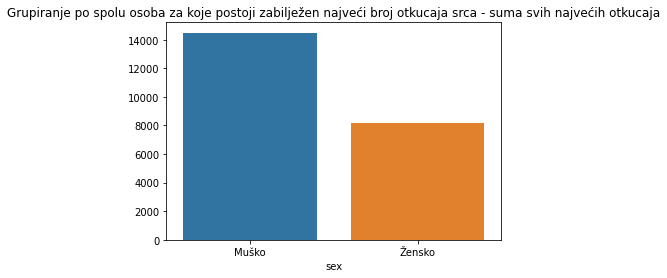

In [ ]:
sns.barplot(x=elderly.groupby(elderly['sex'])['thalach'].agg('sum').index,y=elderly.groupby(elderly['sex'])['thalach'].agg('sum').values)
plt.title("Grupiranje po spolu osoba za koje postoji zabilježen najveći broj otkucaja srca - suma svih najvećih otkucaja")
plt.show()

Idući kod smo koristili za dobiti frenkvencije onih muškaraca koji imaju bolesti srca i onih muškaraca koji nemaju bolesti srca kao i za dobiti frenkvencije onih žena koje imaju bolesti srca i onih žena koje nemaju bolesti srca. Iz plot-a se može vidjeti da je više muškaraca koji imaju bolesti srca od onih koji nemaju. Također, može se vidjeti da je više žena koje nemaju bolesti srca od onih koji imaju.

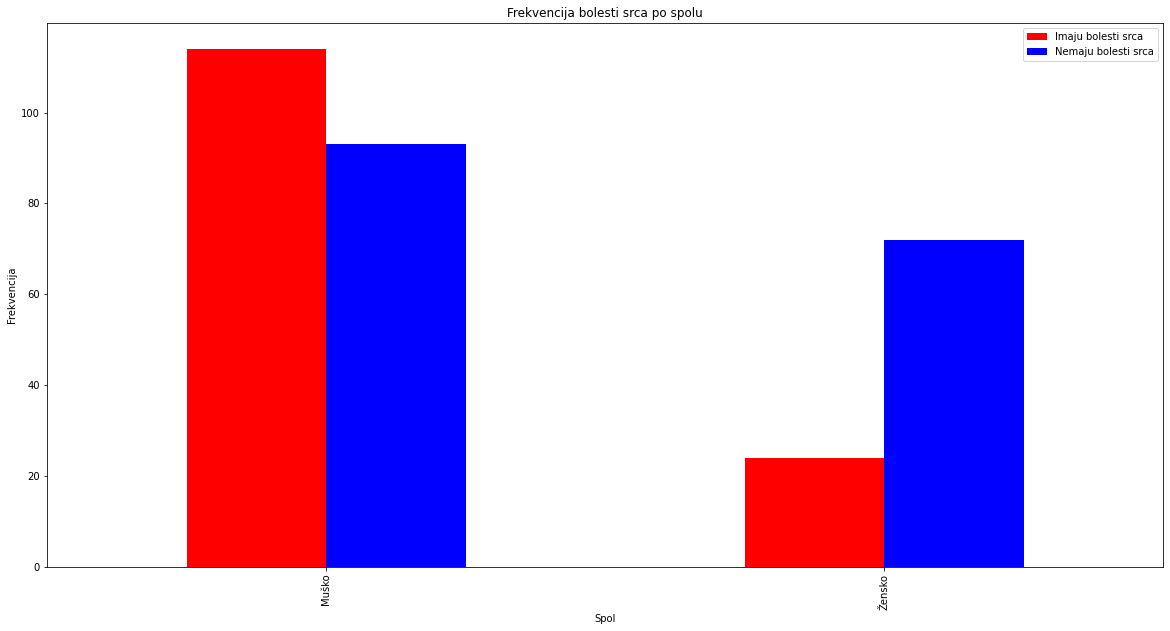

In [ ]:
pd.crosstab(data.Spol,data.target).plot(kind="bar",figsize=(20,10),color=['red','blue' ])
plt.title('Frekvencija bolesti srca po spolu')
plt.xlabel('Spol')
plt.legend(["Imaju bolesti srca", "Nemaju bolesti srca"])
plt.ylabel('Frekvencija')
plt.show()

Idući plot je napravljen zbog vizualizacije raspona godina. Na plot-u se može vidjeti da je najviše onih sa otprilike 55-60 godina, a najmanje onih koji imaju ispod 30 godina i onih poviše 70 godina.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


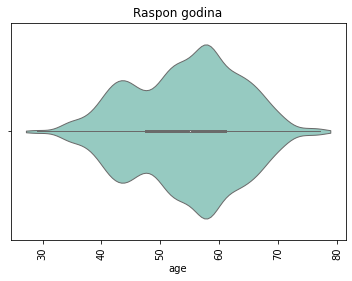

In [ ]:
sns.violinplot(data.age, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Raspon godina")
plt.show()

No handles with labels found to put in legend.


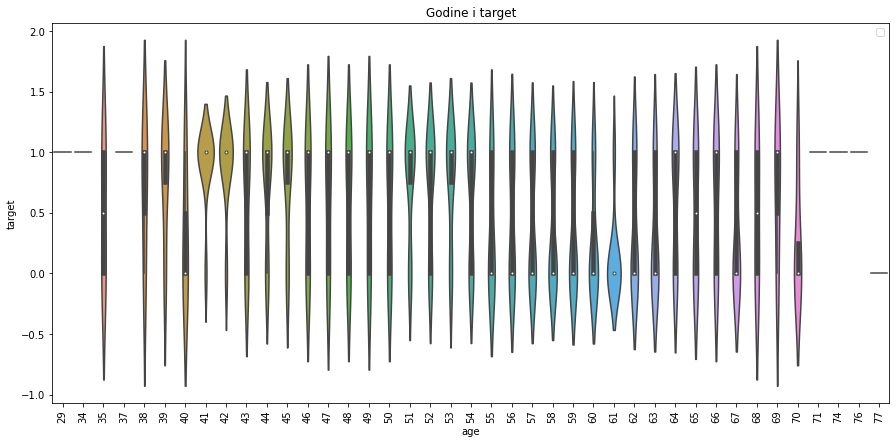

In [ ]:
plt.figure(figsize=(15,7))
sns.violinplot(x=data.age,y=data.target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Godine i target")
plt.show()

Na idućem kružnom grafu se može vidjeti podjela ljudi prema životnom razdoblju. Kao što graf prikazuje najviše je onih koji pripadaju starijem životnom razdoblju (51.2%), a najmanje onih koji pripadaju mladom životnom razdoblju (5.4%).  

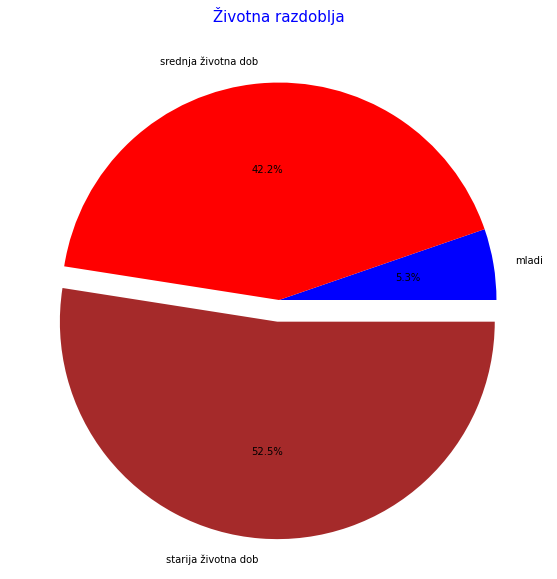

In [ ]:
colors = ['blue','red','brown']
explode = [0,0,0.1]
plt.figure(figsize = (10,10))
plt.pie([len(young),len(middle),len(elderly)],labels=['mladi','srednja životna dob','starija životna dob'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Životna razdoblja',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
data.Spol.value_counts()

Muško     207
Žensko     96
Name: Spol, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


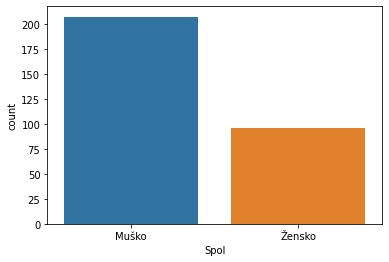

In [ ]:
#Spol (1 = muško; 0 = žensko)
sns.countplot(data.Spol)
plt.show()

Prethodni kod i plot prikazuju broj muškaraca i žena. Vidimo da muškaraca ima više (njih 207) od žena kojih ima 96.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


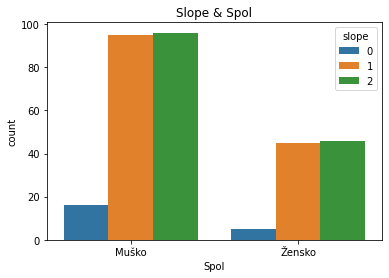

In [ ]:
sns.countplot(data.Spol,hue=data.slope)
plt.title('Slope & Spol')
plt.show()

In [ ]:
total_genders=len(data.Spol)
male=len(data[data['Spol']=="Muško"])
female=len(data[data['Spol']=="Žensko"])
print('Total Genders :',total_genders)
print('Ukupno muškaraca    :',male)
print('Ukupno žena  :',female)


Total Genders : 303
Ukupno muškaraca    : 207
Ukupno žena  : 96


In [ ]:
print("Omjer muškaraca: {:.2f}%".format((male / (total_genders)*100)))
print("Omjer žena: {:.2f}%".format((female / (total_genders)*100)))

Omjer muškaraca: 68.32%
Omjer žena: 31.68%


Prethodnim kodom smo (opet) prikazali: ukupan broj ljudi, broj muškaraca i broj žena kao i omjer muškaraca i žena.

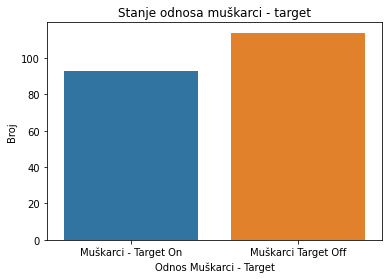

In [ ]:
male_andtarget_on=len(data[(data.sex==1)&(data['target']==1)])
male_andtarget_off=len(data[(data.sex==1)&(data['target']==0)])

sns.barplot(x=['Muškarci - Target On','Muškarci Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Odnos Muškarci - Target')
plt.ylabel('Broj')
plt.title('Stanje odnosa muškarci - target')
plt.show()

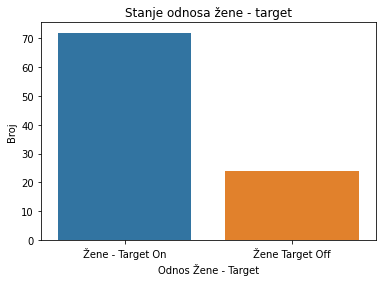

In [ ]:
female_andtarget_on=len(data[(data.sex==0)&(data['target']==1)])
female_andtarget_off=len(data[(data.sex==0)&(data['target']==0)])

sns.barplot(x=['Žene - Target On','Žene Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Odnos Žene - Target')
plt.ylabel('Broj')
plt.title('Stanje odnosa žene - target')
plt.show()

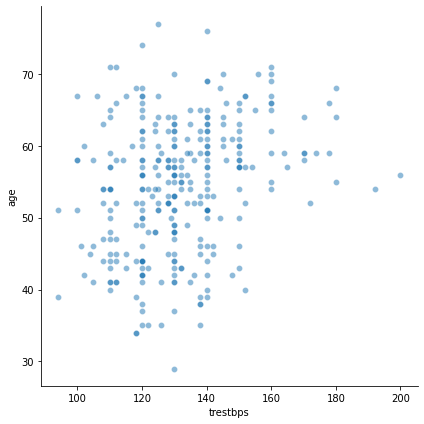

In [ ]:
sns.relplot(x="trestbps", y="age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

In [ ]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Idućim plot-om smo prikazali odnos broja ljudi s vrstom boli u prsima koju imaju. Možemo vidjeti da je najviše onih koji imaju "status at least" (njih ima oko 140), a da je najmanje onih koji su u jako lošem stanju (njih ima oko 20).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


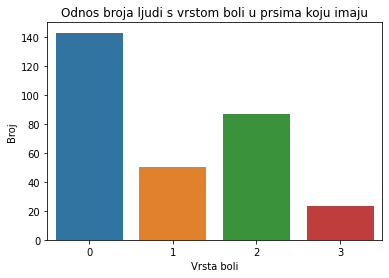

In [ ]:
sns.countplot(data.cp)
plt.xlabel('Vrsta boli')
plt.ylabel('Broj')
plt.title('Odnos broja ljudi s vrstom boli u prsima koju imaju')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

In [ ]:
cp_zero_target_zero=len(data[(data.cp==0)&(data.target==0)])
cp_zero_target_one=len(data[(data.cp==0)&(data.target==1)])

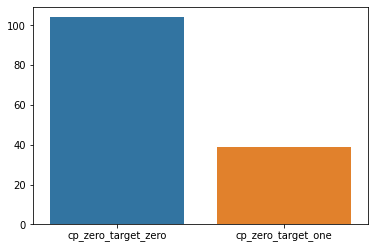

In [ ]:
sns.barplot(x=['cp_zero_target_zero','cp_zero_target_one'],y=[cp_zero_target_zero,cp_zero_target_one])
plt.show()

In [ ]:
cp_one_target_zero=len(data[(data.cp==1)&(data.target==0)])
cp_one_target_one=len(data[(data.cp==1)&(data.target==1)])

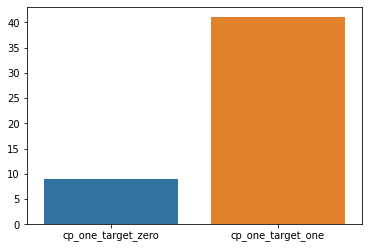

In [ ]:
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()

In [ ]:
cp_two_target_zero=len(data[(data.cp==2)&(data.target==0)])
cp_two_target_one=len(data[(data.cp==2)&(data.target==1)])

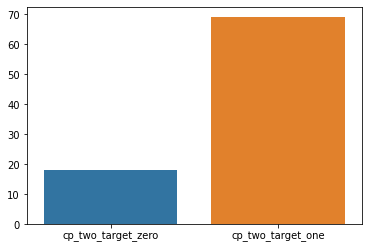

In [ ]:
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

In [ ]:
cp_three_target_zero=len(data[(data.cp==3)&(data.target==0)])
cp_three_target_one=len(data[(data.cp==3)&(data.target==1)])

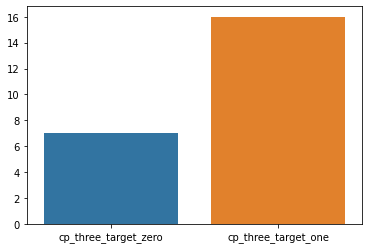

In [ ]:
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()

In [ ]:
cp_0_zene=len(data[(data.cp==0)&(data.sex==0)])
cp_0_muskarci=len(data[(data.cp==0)&(data.sex==1)])

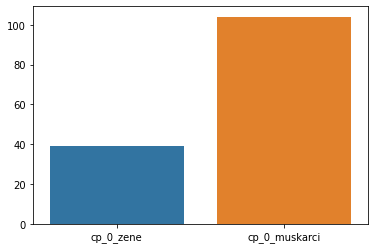

In [ ]:
sns.barplot(x=['cp_0_zene','cp_0_muskarci'],y=[cp_0_zene,cp_0_muskarci])
plt.show()

In [ ]:
cp_1_zene=len(data[(data.cp==1)&(data.sex==0)])
cp_1_muskarci=len(data[(data.cp==1)&(data.sex==1)])

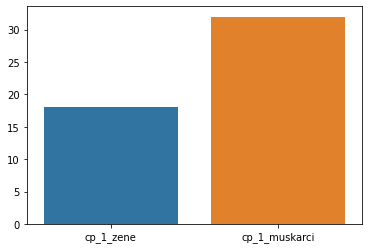

In [ ]:
sns.barplot(x=['cp_1_zene','cp_1_muskarci'],y=[cp_1_zene,cp_1_muskarci])
plt.show()

In [ ]:
cp_2_zene=len(data[(data.cp==2)&(data.sex==0)])
cp_2_muskarci=len(data[(data.cp==2)&(data.sex==1)])

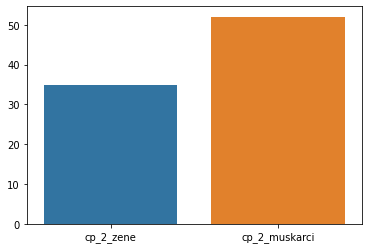

In [ ]:
sns.barplot(x=['cp_2_zene','cp_2_muskarci'],y=[cp_2_zene,cp_2_muskarci])
plt.show()

In [ ]:
cp_3_zene=len(data[(data.cp==3)&(data.sex==0)])
cp_3_muskarci=len(data[(data.cp==3)&(data.sex==1)])

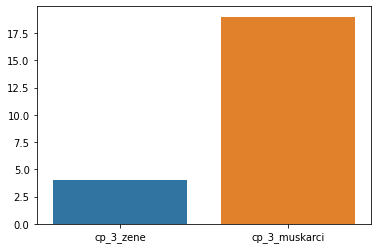

In [ ]:
sns.barplot(x=['cp_3_zene','cp_3_muskarci'],y=[cp_3_zene,cp_3_muskarci])
plt.show()

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


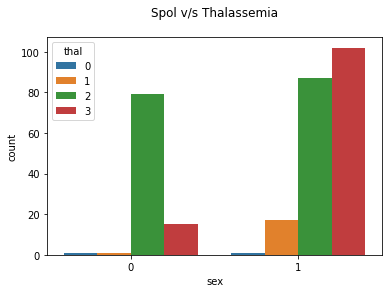

In [ ]:
sns.countplot(data= data, x='sex',hue='thal')
plt.title('Spol v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

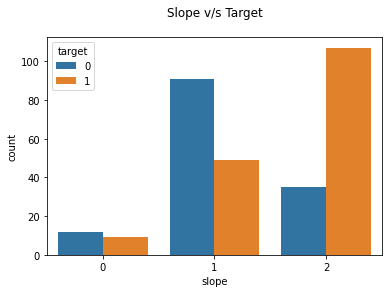

In [ ]:
sns.countplot(data= data, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

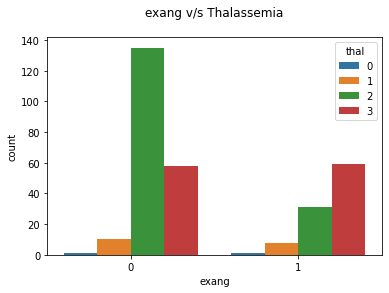

In [ ]:
sns.countplot(data= data, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

Na idućem plot-u smo prikazali odnos broja ljudi koji imaju bolesti srca s njihovim godinama. Iz plot-a se može vidjeti da je najviše (oko njih 12) onih koji imaju oko 55-60 godina.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Godine osoba koje imaju bolesti srca\n')

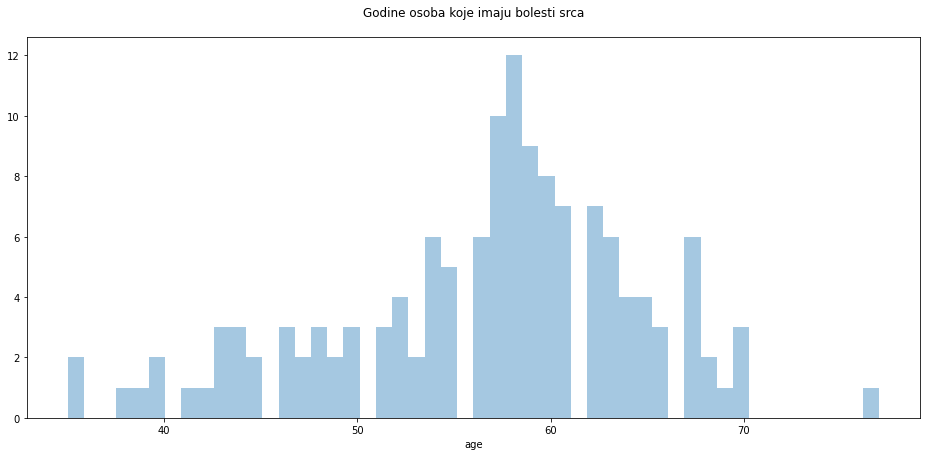

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['age'],kde=False,bins=50)
plt.title('Godine osoba koje imaju bolesti srca\n')

Na idućem plot-u možemo vidjeti chol ljudi koji imaju bolesti srca. Vidimo da najviše ljudi ima chol oko 225. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol ljudi koji imaju bolesti srca\n')

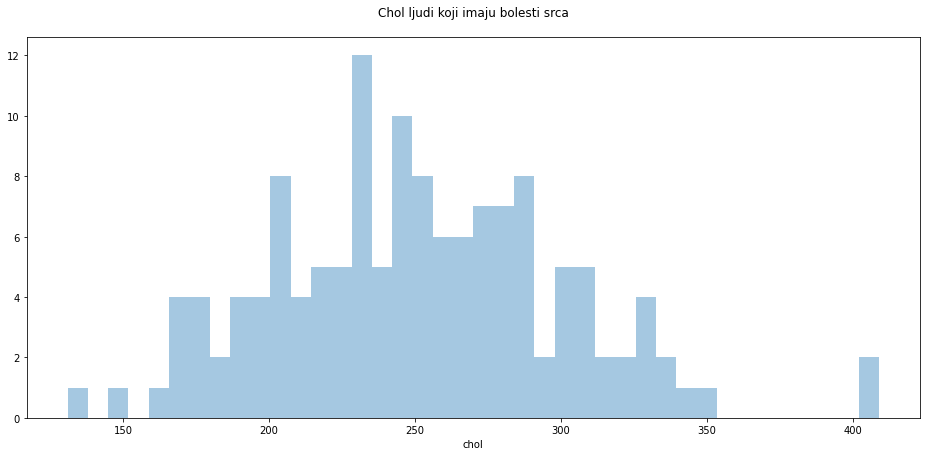

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol ljudi koji imaju bolesti srca\n')

Na idućem plot-u možemo vidjeti thalach (tlak) ljudi koji imaju bolesti srca. Vidimo da najviše ljudi ima thalach oko 130 i oko 140-150.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach ljudi koji imaju bolesti srca\n')

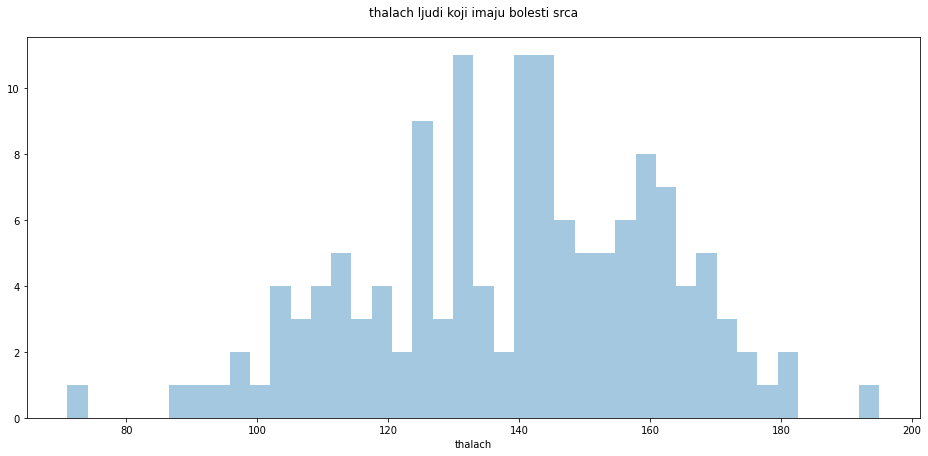

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach ljudi koji imaju bolesti srca\n')

Age vs trestbps(Heart Diseased Patinets)


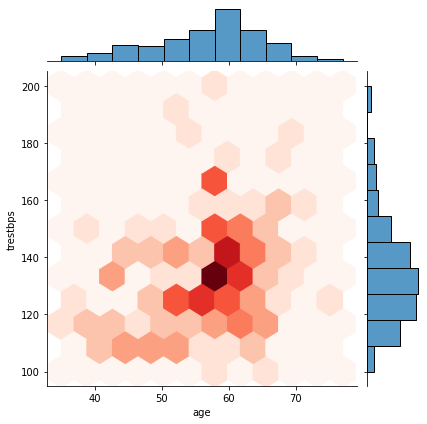

In [ ]:
df2 = data[data['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] 
#target 0 - people with heart disease
pal = sns.light_palette("blue", as_cmap=True)
print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df2,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )

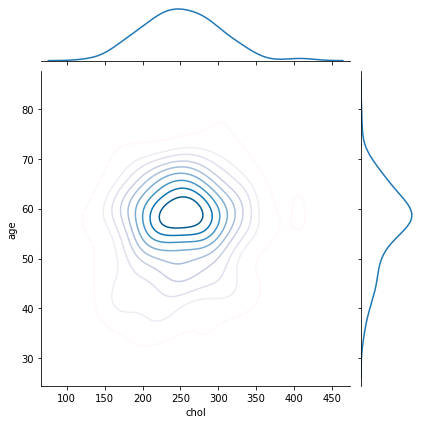

In [ ]:
sns.jointplot(data=df2,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

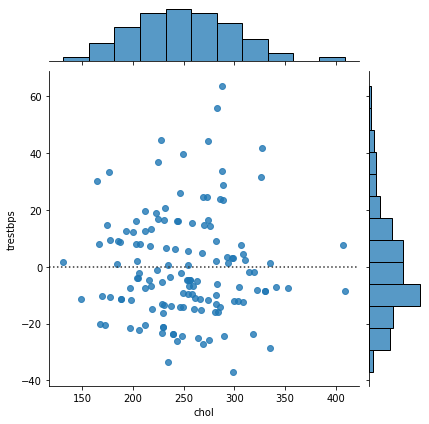

In [ ]:
sns.jointplot(data=df2,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )

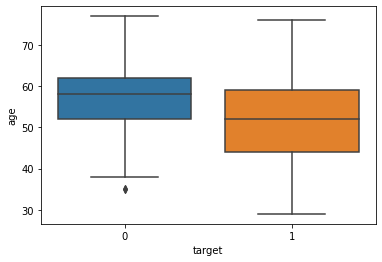

In [ ]:
sns.boxplot(data=data,x='target',y='age')

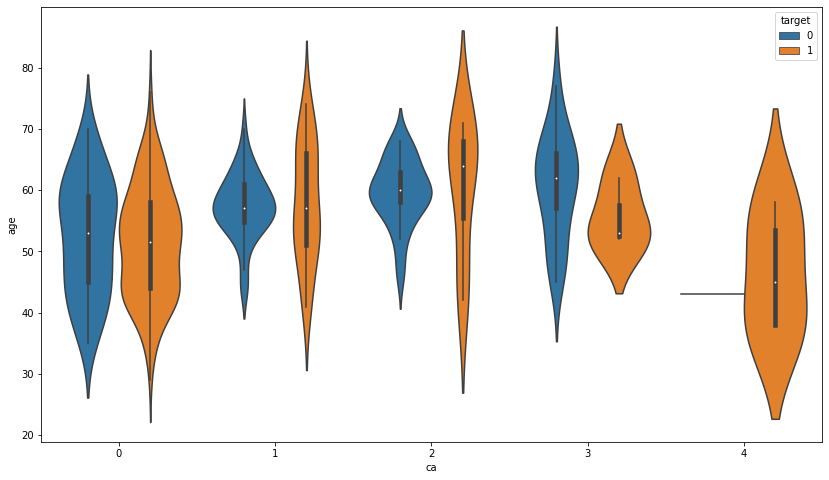

In [ ]:
plt.figure(figsize=(14,8))
sns.violinplot(data=data,x='ca',y='age',hue='target')

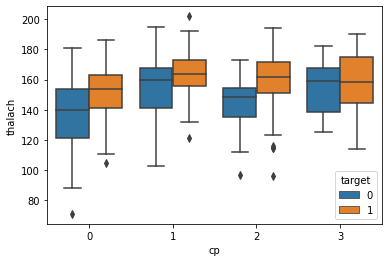

In [ ]:
sns.boxplot(data=data,x='cp',y='thalach',hue='target')

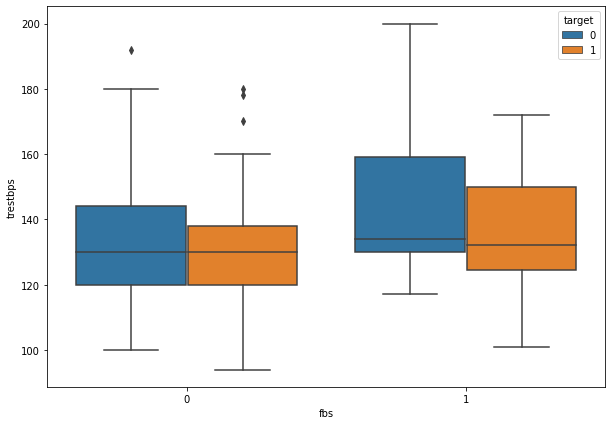

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,x='fbs',y='trestbps',hue='target')

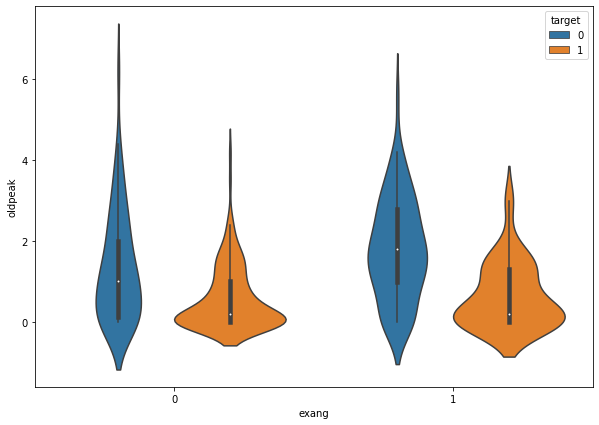

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(data=data,x='exang',y='oldpeak',hue='target')

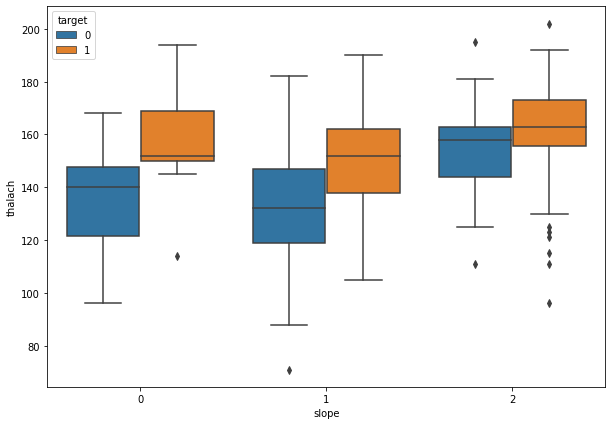

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,x='slope',y='thalach',hue='target')

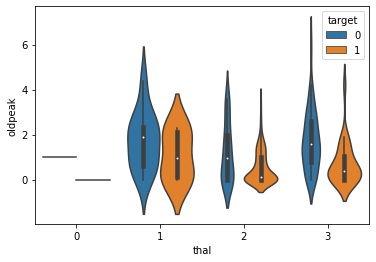

In [ ]:
sns.violinplot(data=data,x='thal',y='oldpeak',hue='target')

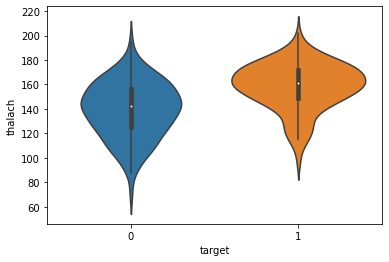

In [ ]:
sns.violinplot(data=data,x='target',y='thalach')

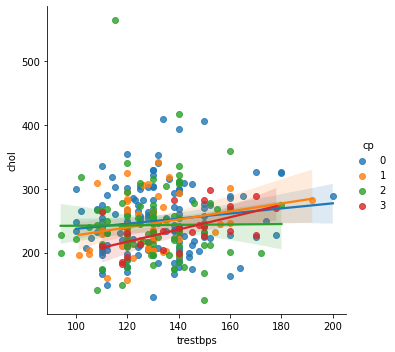

In [ ]:
sns.lmplot(x="trestbps", y="chol",data=data,hue="cp")
plt.show()

In [ ]:
target_0_agerang_0=len(data[(data.target==0)&(data.AgeRange==0)])
target_1_agerang_0=len(data[(data.target==1)&(data.AgeRange==0)])

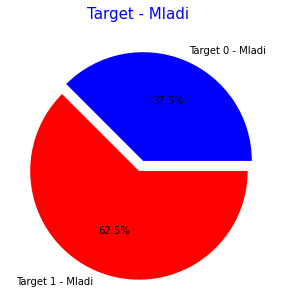

In [ ]:
colors = ['blue','red']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 - Mladi','Target 1 - Mladi'], colors=colors, autopct='%1.1f%%')
plt.title('Target - Mladi  ',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
target_0_agerang_1=len(data[(data.target==0)&(data.AgeRange==1)])
target_1_agerang_1=len(data[(data.target==1)&(data.AgeRange==1)])

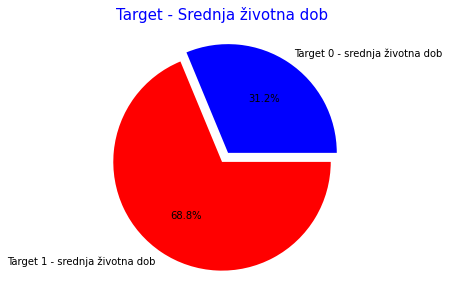

In [ ]:
colors = ['blue','red']
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 - srednja životna dob','Target 1 - srednja životna dob'], colors=colors, autopct='%1.1f%%')
plt.title('Target - Srednja životna dob',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
target_0_agerang_2=len(data[(data.target==0)&(data.AgeRange==2)])
target_1_agerang_2=len(data[(data.target==1)&(data.AgeRange==2)])

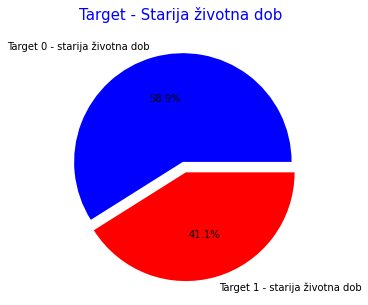

In [ ]:
colors = ['blue','red']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0 - starija životna dob','Target 1 - starija životna dob'], colors=colors, autopct='%1.1f%%')
plt.title('Target - Starija životna dob ',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
data.thalach.value_counts()[:10]


162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
Name: thalach, dtype: int64

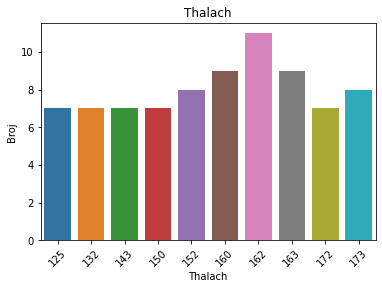

In [ ]:
sns.barplot(x=data.thalach.value_counts()[:10].index,y=data.thalach.value_counts()[:10].values)
plt.xlabel('Thalach')
plt.ylabel('Broj')
plt.title('Thalach')
plt.xticks(rotation=45)
plt.show()

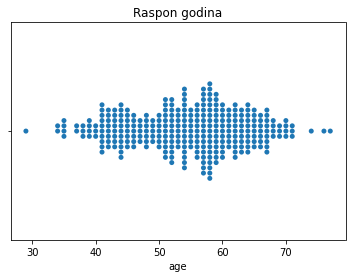

In [ ]:
sns.swarmplot(x=data.age)
plt.title('Raspon godina')
plt.show()

In [ ]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

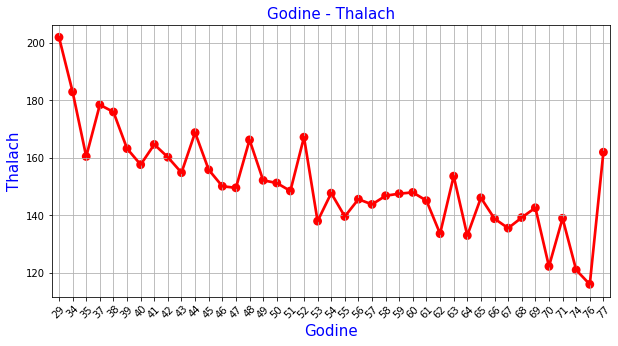

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Godine',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Godine - Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [ ]:
age_range_thalach=data.groupby('AgeRange')['thalach'].mean()

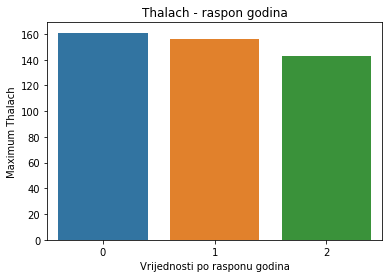

In [ ]:
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Vrijednosti po rasponu godina')
plt.ylabel('Maximum Thalach')
plt.title('Thalach - raspon godina')
plt.show()

In [ ]:
cp_thalach=data.groupby('cp')['thalach'].mean()

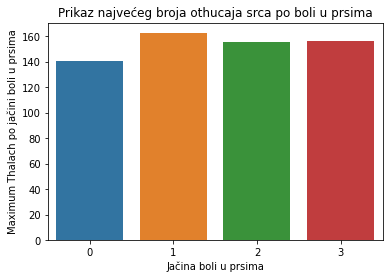

In [ ]:
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Jačina boli u prsima')
plt.ylabel('Maximum Thalach po jačini boli u prsima')
plt.title('Prikaz najvećeg broja othucaja srca po boli u prsima')
plt.show()

In [ ]:
data.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


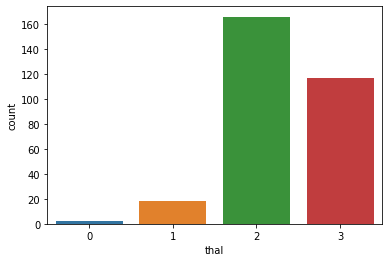

In [ ]:
sns.countplot(data.thal)
plt.show()

In [ ]:
data[(data.thal==0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Spol,AgeRange
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,Žensko,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,Muško,1


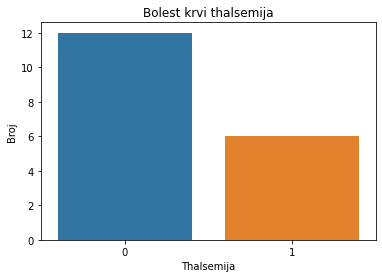

In [ ]:
data[(data['thal']==1)].target.value_counts()
sns.barplot(x=data[(data['thal']==1)].target.value_counts().index,y=data[(data['thal']==1)].target.value_counts().values)
plt.xlabel('Thalsemija')
plt.ylabel('Broj')
plt.title('Bolest krvi thalsemija')
plt.show()

In [ ]:
#Target 1
a=len(data[(data['target']==1)&(data['thal']==0)])
b=len(data[(data['target']==1)&(data['thal']==1)])
c=len(data[(data['target']==1)&(data['thal']==2)])
d=len(data[(data['target']==1)&(data['thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

#Target 0
e=len(data[(data['target']==0)&(data['thal']==0)])
f=len(data[(data['target']==0)&(data['thal']==1)])
g=len(data[(data['target']==0)&(data['thal']==2)])
h=len(data[(data['target']==0)&(data['thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  1
Target 1 Thal 1:  6
Target 1 Thal 2:  130
Target 1 Thal 3:  28
Target 0 Thal 0:  1
Target 0 Thal 1:  12
Target 0 Thal 2:  36
Target 0 Thal 3:  89


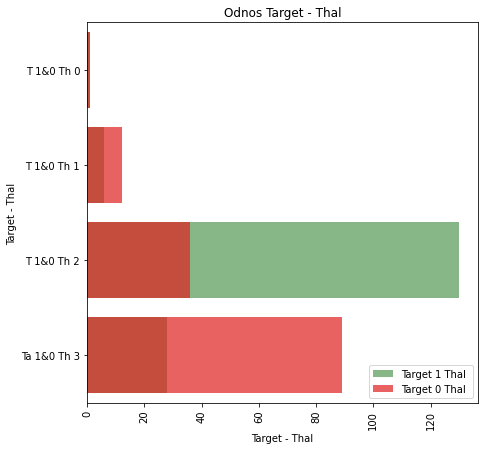

In [ ]:
f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,6,130,28],color='green',alpha=0.5,label='Target 1 Thal ')
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,12,36,89],color='red',alpha=0.7,label='Target 0 Thal')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Target - Thal',ylabel='Target - Thal',title='Odnos Target - Thal')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.target.unique()

array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


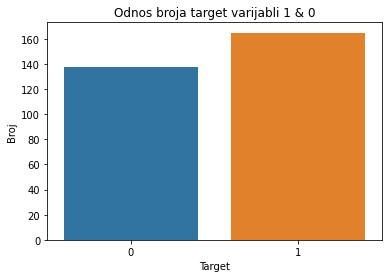

In [ ]:
sns.countplot(data.target)
plt.xlabel('Target')
plt.ylabel('Broj')
plt.title('Odnos broja target varijabli 1 & 0')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


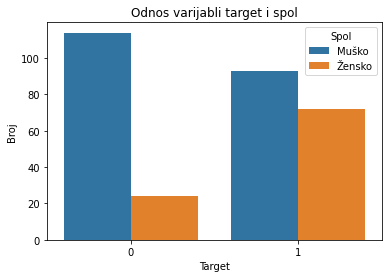

In [ ]:
sns.countplot(data.target,hue=data.Spol)
plt.xlabel('Target')
plt.ylabel('Broj')
plt.title('Odnos varijabli target i spol')
plt.show()

In [ ]:
age_counter_target_1=[]
age_counter_target_0=[]
for age in data.age.unique():
    age_counter_target_1.append(len(data[(data['age']==age)&(data.target==1)]))
    age_counter_target_0.append(len(data[(data['age']==age)&(data.target==0)]))

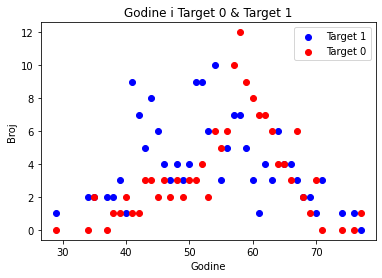

In [ ]:
#Target 1 & 0 
plt.scatter(x=data.age.unique(),y=age_counter_target_1,color='blue',label='Target 1')
plt.scatter(x=data.age.unique(),y=age_counter_target_0,color='red',label='Target 0')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('Godine')
plt.ylabel('Broj')
plt.title('Godine i Target 0 & Target 1')
plt.show()

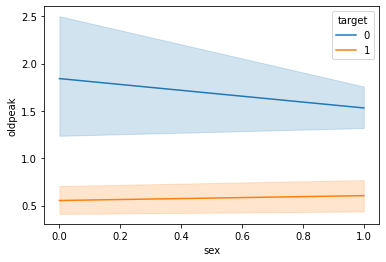

In [ ]:
sns.lineplot(x="sex", y="oldpeak",
             hue="target",data=data)
plt.show()

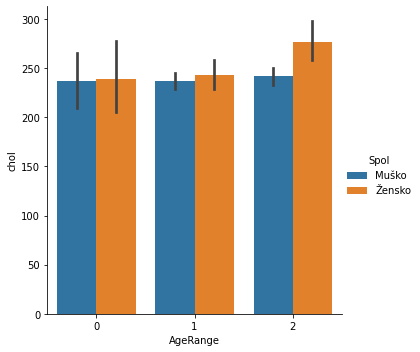

In [ ]:
g = sns.catplot(x="AgeRange", y="chol",
                 hue="Spol",
                 data=data, kind="bar")
plt.show()

In [ ]:
male_young_t_1=data[(data['sex']==1)&(data['AgeRange']==0)&(data['target']==1)]
male_middle_t_1=data[(data['sex']==1)&(data['AgeRange']==1)&(data['target']==1)]
male_elderly_t_1=data[(data['sex']==1)&(data['AgeRange']==2)&(data['target']==1)]
print(len(male_young_t_1))
print(len(male_middle_t_1))
print(len(male_elderly_t_1))

8
55
30


No handles with labels found to put in legend.


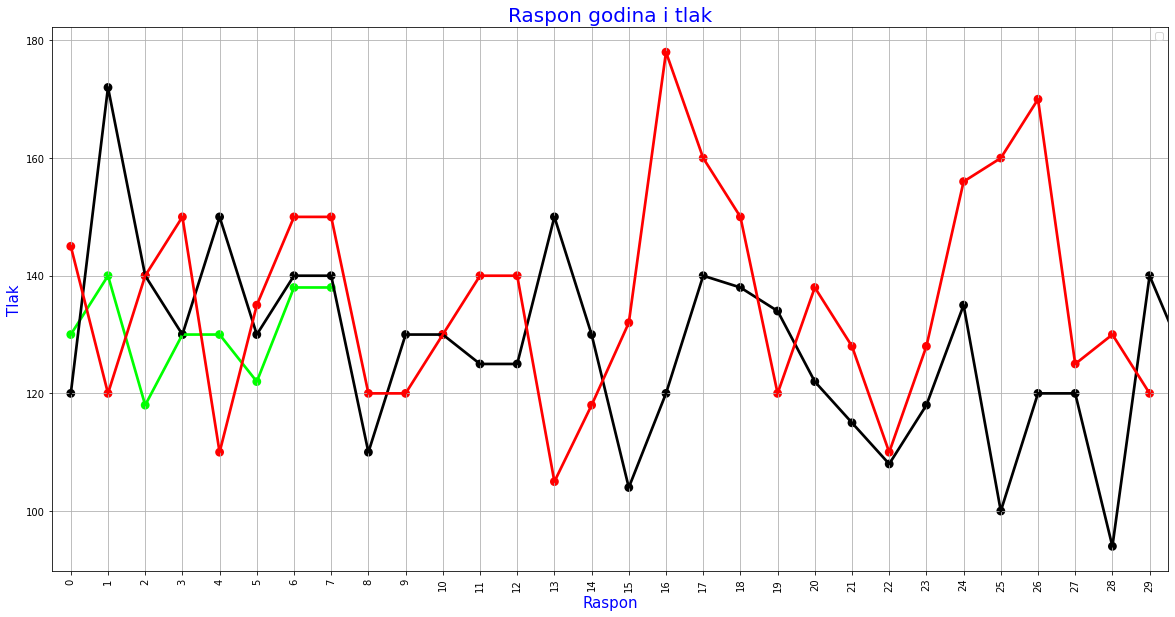

In [ ]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=np.arange(len(male_young_t_1)),y=male_young_t_1.trestbps,color='lime',alpha=0.8,label='Mladi')
sns.pointplot(x=np.arange(len(male_middle_t_1)),y=male_middle_t_1.trestbps,color='black',alpha=0.8,label='  Srednja životna doba')
sns.pointplot(x=np.arange(len(male_elderly_t_1)),y=male_elderly_t_1.trestbps,color='red',alpha=0.8,label='Starija životna dob')
plt.xlabel('Raspon',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right',frameon=True)
plt.ylabel('Tlak',fontsize = 15,color='blue')
plt.title('Raspon godina i tlak',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
data_filter_mean=data[(data['target']==1)&(data['age']>50)].groupby('sex')[['trestbps','chol','thalach']].mean()

In [ ]:
data_filter_mean.unstack()

          sex
trestbps  0      132.804348
          1      132.396226
chol      0      274.500000
          1      230.132075
thalach   0      149.217391
          1      154.566038
dtype: float64

# Strojno učenje - model, uvježbavanje i testiranje

Da bi dobili rezultate procjena koristili smo niz algoritama strojnog učenja. To su algoritmi logističke regresije, stroja potpornih vektora (SVM), K - bliskih susjeda (kNN), GradientBoostingClassifier i RandomForestClassifier.


Prvi algoritam koji će biti implementiran je algoritam Logističke regresije. Da bismo implementirali ovaj model algoritma, potrebno je odvojiti varijable u set zavisnih i nezavisnih varijabli unutar našeg seta podataka. Osim toga, koriste se različiti parametri za odabir pravog modela. Prilikom kreiranja ovih parametara, proces pronalaženja najboljih rezultata napravljen je davanjem vrijednosti hiperparametara. Budući da se izbor svodi na optimizaciju tzv.hiperparametara nekog modela, često se koriste i nazivi optimizacija modela, optimizacija parametara i odabir modela.


Većina naših podataka je kategorizirana i taj dio smo mogli vidjeti u analizi podataka. Koristiti ćemo skaliranje podataka. U skupu podataka, podaci koji su međusobno udaljeni se skaliraju tako da se izradi specifiično skaliranje. Kao rezultat sklairanja podaci poprimaju vrijednosti 0,1. U ovom projektu korištena je standardna i normalizacijska ljestvica.


In [ ]:

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeRange
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.808707
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.030911
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.079877
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.214313
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.138688
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.133788
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.179119
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.306015
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.072205
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.155264


Dva najčešće korištena testa za utvrđivanje odnosa između varijabli su koleracija i p-vrijednost. Korelacija je način testiranja u kojem se vidi imaju li dvije varijable bilo kakav odnos, dok p-vrijednost govori je li rezultat statistički značajan. Koeficijent korelacije koristi se u statistici za mjerenje koliko je jaka veza između dvije varijable. Postoji nekoliko vrsta koeficijenata korelacije (npr. Pearson, Kendall, Spearman), ali najčešće se koristi Pearsonov koeficijent korelacije. Ovaj koeficijent se izračunava kao broj između -1 i 1 pri čemu je 1 najjača moguća pozitivna korelacija, a -1 najjača moguća negativna korelacija. Koeficjent se dobije kao omjer između kovarijance dviju varijabli i njihovih standardnih devijacija - zbog toga imamo normalizirano mjerenje kovarijance. Mjera može odražavati samo linearnu koleraciju varijabli, a zanemarivati druge vrste odnosa ili koleracija.  

In [ ]:
data=data.drop('Spol',axis=1)
dataX=data.drop('target',axis=1)
dataY=data['target']

Obzirom da imamo dva puta zapisan podatak o spolu u stupcima("sex" i "Spol") koji su služili za bolju i deskriptivniju analizu podataka jedan od njih će biti potrebno ukloniti. Zatim podatke razdvajamo u dva dijela dataX i dataY. Cilj je na temelju modela tako dobro aproksimirati funkciju preslikavanja koja će u slučaju novih ulaznih podataka (x) dobro predvidjeti izlazne varijable (y) za te podatke. U našem slučaju podaci u skupu x su sve varijable osim varijable target koja pripada u skup y - želimo odrediti hoće li pacijent imati bolesti srca ili ne.

Zbog toga je potrebno podatkke podijeliti u skup podataka za uvježbavanje i testiranje. Skup podataka za uvježbavanje dio je izvornog skupa podataka kojeg koristimo za uvježbavanje našeg ML modela. Model uči nad orginalnim podacima pokretanjem određenih algoritama i mapira funkciju F(x) gdje je "x" nezavisna varijabla(ulazi) za "y" koji je zavisna varijabla (izlaz). Dok uvježbavamo model nad određenim skupom podataka osiguravamo ulazne i izlazne podatke tako da model može naučiti predvidjeti izlaz na temelju ulaznih podataka.
Podaci za testiranje su u osnovi skup za provjeru valjanosti koji je rezerviran iz izvornog skupa podataka. Koristi se za provjeru točnosti našeg modela uspoređivanjem predviđenog ishoda odela sa stvarnim ishodom skupa testnih podataka. Ne pružamo izlaznu varijablu modelu tijekom testiranja iako znamo ishod jer se podaci testa izdvajaju iz samog izvornog skupa podataka. Kad nam model daje svoja predviđanja na temelju učenja iz seta  podataka za uvježbavanje, uspoređujemo predviđeni ishod s izvornim ishodom kako bismo dobili mjeru točnosti ili izvedbe našeg modeela na nevidljivim podacima.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

Za razdvajanje podataka u set podataka za uvježbavanje i testiranje koristi se metoda train_test_split iz biblioteke scikit. Podatke smo razdvojili tako da 80% podatak ide na uvježbavanje, a 20% na testiranje.


In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (203, 13)
X_test (50, 13)
y_train (203, 1)
y_test (50, 1)


In [ ]:
 scaler = MinMaxScaler()  
 scaler.fit(X_train)    
 X_train = pd.DataFrame(scaler.transform(X_train))
 X_test = pd.DataFrame(scaler.transform(X_test))

PCA je metoda redukcije dimenzionalnosti koja se često koristi za smanjivanje dimenzionalnosti velikih skupova podatka, pretvaranjem velikog skupa varijabli u manji koji još uvijek sadrži većinu informacija kao i u velikom skupu. Točnost se zamjenjuje jednnostavnošću. Budući da je manje skupove podataka lakše istražiti i vizualizirati ideja PCA je jednistavna - smajniti broj varijabli i analizu podataka učiniti bržom i lakšom za algoritme strojnog učrenja.

In [ ]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[0.22091853 0.18461935 0.11941427 0.10122925 0.08716873 0.07589597
 0.06234475 0.05443112 0.03620378 0.02486837 0.01715112 0.01517514
 0.00057962]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[[ 7.77313147e-02  1.64537590e-01 -5.19408217e-01  2.23294295e-02
   1.16159641e-01  2.92479369e-03 -1.04551599e-01 -2.25967289e-01
   6.80732803e-01  2.04044655e-01 -2.96969647e-01  1.36700019e-01
   9.59094276e-02]
 [ 6.86594268e-02  8.22719267e-01  1.87768226e-01  2.21114089e-01
  -2.58873221e-01  1.40881998e-01  1.10336974e-01  2.73529109e-01
   1.03747136e-01  2.16737206e-02  1.42780119e-01  4.86625658e-02
   1.62565723e-01]
 [ 1.00766558e-01 -1.29682934e-01  3.19632373e-01  1.39463325e-01
   1.15659158e-04  8.12478313e-01 -2.34676770e-01 -1.21609810e-01
  -3.24774505e-03  1.28133627e-01 -3.16101940e-01  5.88905693e-02
  -4.01634237e-02]
 [ 1.71921358e-01 -4.44945935e-01  1.96692091e-01  3.69405558e-01
  -3.03031716e-01 -5.00370274e-02  4.93452222e-01  2.05542272e-01
   4.23475833e-01  6.83745

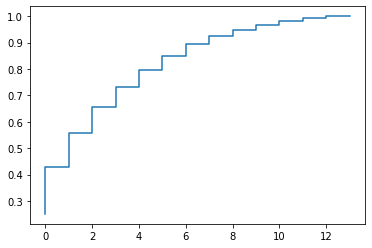

In [ ]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

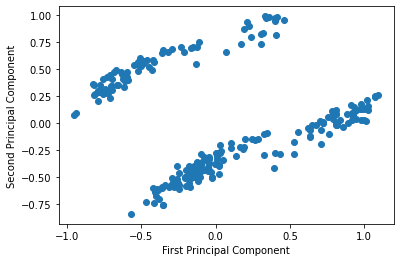

In [ ]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

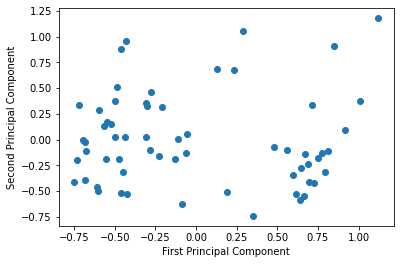

In [ ]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [ ]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [ ]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

# Logistička regresija
Logistička regresija je vrsta parametarskkog modela klasifikacije. Jedan je od najjednostavnijih algoritama. Modeli imajuodređeni fiksin broj parametara koji ovise o broju ulaznih značajki i daju određeni fiksni broj parametara koji ovise o broju ulaznih značajki i daju kategoričko predviđanje - u našem slučaju ima li pacijent bolest ili ne. Zavisna varijabla može isključivo poprimiti vrijednosti 0 ili 1.Binarne vrijednosti, pridružene nominalnoj varijabli, označavaju pojavu nekog događaja ili prisutnost nekog atributa.Binarna logistička regresija ne pretpostavlja linearnu zavisnost između zavisnih i nezavisnih varijanti
Najmanje jedna nezavisna varijabla je numerička kontinuirana, ostale mogu biti i kategorične varijable
Binarna logistička regresija ne pretpostavlja da zavisna varijabla ili greške relacije slijede normalnu distribuciju.

Kao parametri korišteni je određeni raspon C parametra koji nam kaže koliko "možemo vjerovati" ispravnosti modela. Određuje snagu regularizacije modela. Veće vrijednsti C parametra odgovaraju manjoj regularizaciji. Korištena regularizacija je L2 regularizacija.

In [ ]:
parameters=[
{
    'penalty':['l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 

('Dim1', 'Dim2', 'Dim3')
**************************************************
Best parameters set:
{'C': 0.1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       109
           1       0.74      0.87      0.80       133

    accuracy                           0.76       242
   macro avg       0.77      0.75      0.75       242
weighted avg       0.77      0.76      0.76       242

**************************************************
Train Confusion Matrix:
[[ 68  41]
 [ 17 116]]
**************************************************
Test Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
  

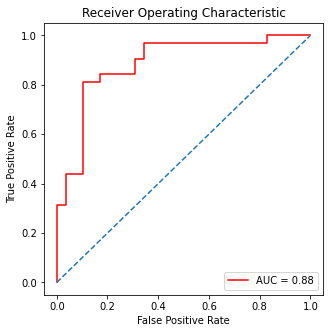

Accurancy Oranı : 0.7868852459016393
Logistic TRAIN score with  0.7975206611570248
Logistic TEST score with  0.7868852459016393



In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l2',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

#print('Hata Oranı :',r2_score(y_test,y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

[[20  9]
 [ 4 28]]


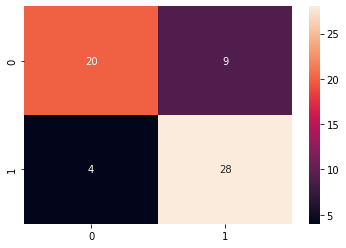

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print('CoEf:\n')
print(lr.coef_)
print('Intercept_\n')
print(lr.intercept_)
print('Proba:\n')
print(lr.predict_log_proba)

CoEf:

[[-1.60511491 -0.11292234 -0.28239872  0.39538275 -0.26715898 -0.32013569
  -0.00342234 -0.33632214]]
Intercept_

[0.21919064]
Proba:

<bound method LogisticRegression.predict_log_proba of LogisticRegression(C=0.1, random_state=0)>


Matrica konfuzije je mjera ispravnosti predviđanja napravljenih klasifikacijskim modelom. To je matrični prikaz točnih i netočnih predviđanja koje je napravio model. Ako pogledamo našu matricu napravljena je na temelju 4 pojma "ispravno pozitivan" za ispravno predviđene vrijednosti događaja,"lažno pozitivan" za netočno predviđene vrijednosti događaja."ispravno negativan" za ispravno predviđene vrijednosti bez događaja i "lažno negativan" za netočno predviđene vrijednosti bez događaja.

# K-susjedi
K-najbliži susjedi ili skraćeno KNN je algoritam koji pretpostavlja da su slične stvari blizu jedna
drugoj. Na toj pretpostavci algoritmom se izračuna udaljenost između točaka u prostoru. Što je ta
udaljenost manja, dvije točke su sličnije. Sličnosti se računaju korištenjem udaljenosti među podacima, npr. Euklidska udaljenost. Kada se izračunaju sve udaljenosti, izabere se k-najbližih podataka. Od tih podataka se uzimaju značajke. Ako se radi io problemu regresijer nejčešće se uzima srednja vrijednosti, a ako se radi o klasifikaciji mod od značajki. Određivanje optimalne vrijednosti za k niije jednostavno, međutim najčešće se koristi najjednostavnija metoda. Napravi se više algoritama sa različitim k vrijednostima i odabere se onaj koji je imao najmanju grešku.

Kao parametri su odabrane različite vrijednosti k tako da bi mogli pogoditi za koju vrijednost k nam algoritam vraća najbolju vrijednost - točnost...

In [ ]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 9}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.87      0.83      0.85       133

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242

**************************************************
Train Confusion Matrix:
[[ 92  17]
 [ 22 111]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.71      0.91      0.79      

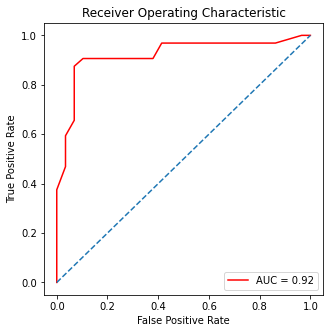

Accurancy Oranı : 0.8688524590163934
KNN TRAIN score with  0.7851239669421488
KNN TEST score with  0.8688524590163934

[[24  5]
 [ 3 29]]


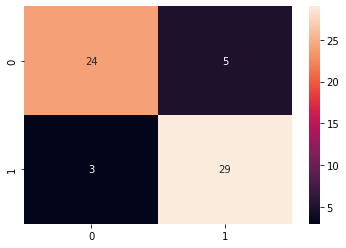

In [ ]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

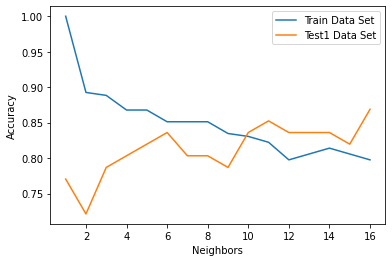

In [ ]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [ ]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.8059523809523809, 0.7692460317460318, 0.8232142857142857, 0.8025793650793651, 0.826984126984127, 0.8061507936507937, 0.798015873015873, 0.8017857142857142, 0.7648809523809522, 0.7688492063492064, 0.7690476190476191, 0.748015873015873, 0.7605158730158729, 0.7563492063492063, 0.7688492063492064, 0.7646825396825397]


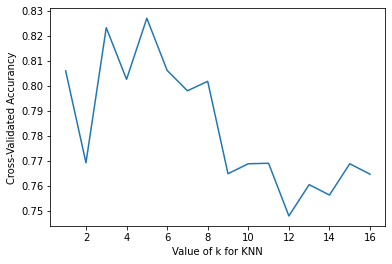

In [ ]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [ ]:
print('Leaf Size :',knn.leaf_size)
print('Metric :',knn.metric_params)
print('Radius :',knn.radius)
print('Weights :',knn.weights)
print('Algorithms :',knn.algorithm)

Leaf Size : 30
Metric : None
Radius : None
Weights : uniform
Algorithms : auto


Prethodi grafovi nam prikazuju odnos točnosti i broja k - susjeda.

# Naive Bayes
Naive Bayes je algoritam za klasifikaciju koji je baziran prema Bayesovom teoremu. Bayesov teorem se koristi kako bi se pronašla vjerojatnost određene hipoteze s postojećim dokazima. Koriasti se za rješavanje problema klasifikacije. Jedan je od najjednostavnijih i najučinkovitijih klasifikacijskih algoritama koji pomaže u izgradnjih modela strojnog učenja koji mogu brzo predviđati. To je probabilistički klasifikator što znači da predviđa na temelju vjerojatnosti nekog objekta. Postoje tri vrste naivnog Bayesa: Gaussov- model pretpostavlja da značajke slijede normalnu distribuciju. To znači ako prediktori uzimaju kontinuirane vrijednosti umjesto diskretnih, tada model pretpostavlja da su te vrijednosti uzrokovane iz Gaussove distribucije. Multinomijalni - koristi se kada su podaci višenomski distribuirani. Bernoulijev - radi slično multinomijalnom klasifikatoru , ali preditorske varijable su nezavisne Boolove varijable.

In [ ]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'C': 5, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       109
           1       0.81      0.84      0.82       133

    accuracy                           0.80       242
   macro avg       0.80      0.80      0.80       242
weighted avg       0.80      0.80      0.80       242

**************************************************
Train Confusion Matrix:
[[ 82  27]
 [ 21 112]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      

# SVM
Stroj potpornih vektora algoritam je nadziranog učenja. Koristi se i za probleme regresije i za probleme klasifikacije.
SVM pronalazi liniju između različitih klasa u podacima tako da je udaljenost između najbližih točaka, koji se još nazivaju vektori podrške, što veća. 
Drugim riječima SVM traži maksimalnu marginu kojom će se podaci jednako podijeliti pomoću linije.
SVM funkcionira jako dobro u višim dimenzijama (dimenzija ovisi o broju značajki) i često se koristi kada se problem nalazi u n dimenzionalnom prostoru, gdje je n veći od dva. Kod viših dimenzija podatke više ne dijeli pravac nego ploha.
Dobra margina je ona kod koje je što veća (maksimizirana) i jednaka udaljenost između dvije klase. Podaci često znaju biti nelinearno razdjeljivi. Tada neke krivulje (polinomi višeg stupnja) moraju razdvajati podatke. To se naziva i podizanje(mapiranje) u višu dimenziju.
 Za to se koristi takozvani trik jezgre. Jezgra predstavlja transformaciju u višu dimenziju Neke od najpoznatijih jezgri, odnosno transformacija su: RBF (Radial Basis Function ), Polinomialna jezgra, Gaussova jezgra, Sigmoidna jezgra itd.


Gamma parametar - Određuje udaljenost točaka koje će se uzeti u obzir.
Niska gamma vrijednost – daleke točke se također uzimaju u obzir, visoka gamma vrijednost – bliske točke se uzimaju u obzir. 
Regularizacija (C parametar) - govori SVM optimizaciji koliko krivo klasificiranih podataka tijekom poučavanja želi izbjeći. Za veliki C optimizator će uzeti manju marginu, pa će linija biti bolja u klasifikaciji podataka tijekom poučavanja. Mala C vrijednost će uzeti veću marginu ali će krivo klasificirati neke podatke
Gaussian Radial Basis Function(RBF) – najčešće korištena kernel funkcija. Najčešće se koristi kod nelinearnih podataka. Radi dobu podjelu kada nema prethodnog znanja o podacima.


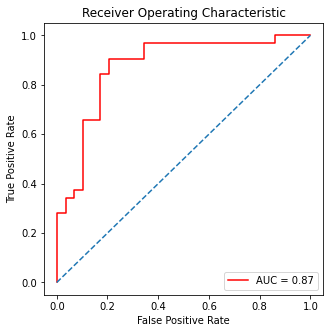

Accurancy Oranı : 0.819672131147541
SVC TRAIN score with  0.8140495867768595
SVC TEST score with  0.819672131147541

[[21  8]
 [ 3 29]]


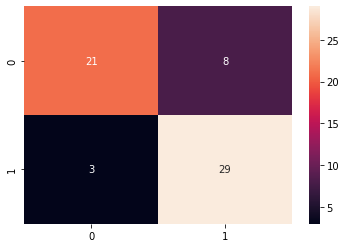

In [ ]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print('Coef :',svc.coef0)
print('Dual Coef_',svc.dual_coef_)
print('Fit Status :',svc.fit_status_)
print('Gamma :',svc.gamma)
print('Kernel :',svc.kernel)
print('SV :',svc.support_vectors_)
print('Probablity :',svc.probability)

Coef : 0.0
Dual Coef_ [[-5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -0.96732361 -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -1.39769137 -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -2.06369507 -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -3.77204316 -5.         -5.
  -5.          4.24991139  5.          5.          5.          5.
   5.          5.          5.          5.          5.          2.56904229
   5.          5.          5.          5.          5.          5.
   5.          5.          5.          5.          5.          5.
   5.          5.          5.          5.     

# Gradient Boosting Machine
Algoritam podizanja stabala odluke temelji se na slijednom učenju algoritama na
pogreškama prethodnih algoritama što znači da se stabla odluke ne grade zasebno,
već slijedno. Svako novo stablo odluke "uči" na pogreškama koje su napravila prijašnja stabala odluke. Učeći na greškama prethodnih stabala, algoritmu treba
manje vremena (iteracija) da se predvidi rezultat nego što bi trebalo jednom
stablu odluke. Postoji više vrsta algoritma podizanja. Najpoznatiji, odnosno
najčešće korišteni su AdaBoost (engl. Adaptive Boosting), algoritam podizanja
gradijenta (engl. Gradient Boosting) i ekstremno podizanje gradijenta - XGBoost
(eXtreme Gradient Boosting). U algoritmu podizanjem gradijenta (engl. Gradient Boosting) stabla se grade slijedno. U svakoj rundi učenja izgradi se jedno stablo odluke te se predviđanje istog
usporedi sa stvarnim rezultatom. Razliku između predikcije algoritma i stvarnog
rezultata možemo predstaviti funkcijom gubitka. U klasifikacijskim algoritmima
funkciju gubitka predstavlja "cijena" koja je plaćena za pogrešku u klasifikaciji,
odnosno za netočnost predviđanja, a glavni cilj je tu funkciju minimizirati.

Pokušava se naći kombinacija parametara koja daje najsličniju točnost predikcija
na skupovima za učenje i testiranje, odnosno najsličniju pogrešku.

In [ ]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 17, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.54      0.70       109
           1       0.73      0.99      0.84       133

    accuracy                           0.79       242
   macro avg       0.85      0.77      0.77       242
weighted avg       0.84      0.79      0.78       242

**************************************************
Train Confusion Matrix:
[[ 59  50]
 [  1 132]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.38      0.54        29
           1       0.63      0.97      0.77        32

    accuracy  

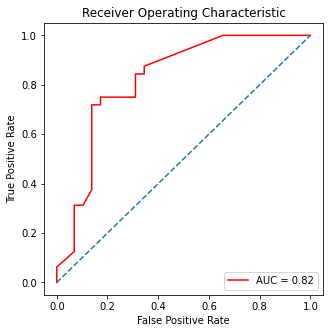

Accurancy Oranı : 0.7540983606557377
GradientBoostingClassifier TRAIN score with  0.8884297520661157
GradientBoostingClassifier TEST score with  0.7540983606557377

[[19 10]
 [ 5 27]]


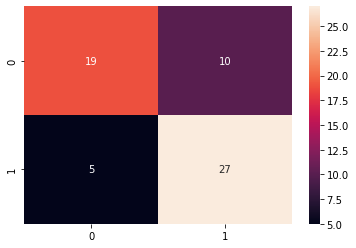

In [ ]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

# Random forest

Algoritam slučajna šuma (engl. random forest) je algoritam nadziranog učenja.Radi tako da izgradi više stabala odluke (ovisno o parametru n_estimators) te
ih zatim spoji kako bi se dobila što bolja i stabilnija predviđanja. Takozvanospajanje zapravo se radi algoritmom pakiranja (engl. bagging), koji je, uz algoritam podizanja, još jedna ansambl metoda. Za razliku od algoritma podizanja koji je opisan prije, algoritam pakiranja ne gradi stabla odluke slijedno, već
paralelno, a na kraju uzima najčešću vrijednost predviđanja od tih stabala odluke i dolazi do pravog predviđanja. Nadalje, algoritam može biti korišten i za
klasifikacijske i regresijske probleme što čini većinu strojnog učenja danas.U ovom radu koristi se razred RandomForestClassifier iz Pythonove biblioteke
sklearn za implementaciju algoritma slučajne šume.

In [ ]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 18, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.98      0.98      0.98       133

    accuracy                           0.98       242
   macro avg       0.97      0.97      0.97       242
weighted avg       0.98      0.98      0.98       242

**************************************************
Train Confusion Matrix:
[[106   3]
 [  3 130]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.84      0.75        3

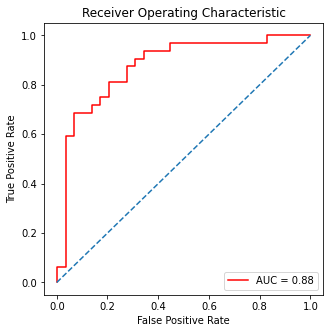

Accurancy Oranı : 0.8032786885245902
RandomForestClassifier TRAIN score with  0.9586776859504132
RandomForestClassifier TEST score with  0.8032786885245902

[[20  9]
 [ 3 29]]


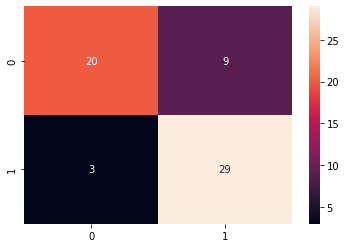

In [ ]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

TEST set score w/ 1 estimators: 0.63934
TEST set score w/ 2 estimators: 0.7377
TEST set score w/ 3 estimators: 0.70492
TEST set score w/ 4 estimators: 0.72131
TEST set score w/ 5 estimators: 0.80328
TEST set score w/ 6 estimators: 0.78689
TEST set score w/ 7 estimators: 0.81967
TEST set score w/ 8 estimators: 0.83607
TEST set score w/ 9 estimators: 0.81967
TEST set score w/ 10 estimators: 0.83607


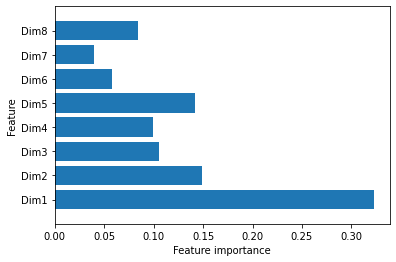

In [ ]:
plot_feature_importances(rf)
plt.show()

# Stabla odluke

Stabla odluke mogu raditi i s klasifikacijskim i regresijskim algoritmima zbog čega i jesu uvelike upotrebljivi u svijetu strojnog učenja. U ovom projektu smo se fokusirali na na implementaciju klasifikacijskih stabala odluke s obzirom na skup podataka. Naime, klasifikacijski algoritam koristi se za skup podataka u kojem je predviđanje diskretna, odnosno nebrojčana vrijednost - u našem slučaju ima li pacijent bolest ili nema.

In [ ]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

**************************************************
Train Confusion Matrix:
[[109   0]
 [  0 133]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.68      0.52      0.59        29
           1       0.64      0.78      0.70        32

    accuracy                           0.66        61
  

# Kernel SVM

Funkcija kernela je uzeti podatke kao ulaz i transformirati ih u traženi oblik. Različiti SVM algoritmi koriste različite vrste funkcija kernela.

In [ ]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       109
           1       0.78      0.83      0.81       133

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242

**************************************************
Train Confusion Matrix:
[[ 78  31]
 [ 22 111]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
  

# **Ostali algoritmi**
U ovom odjeljku će se samo dodati još neke inačice klasfikacijskih algoritama koji su objašnjeni u prethodnim odjeljcima i ponoviti još neki - samo što će ovaj put drugačije biti podjeljeni podaci za uvježbavanje i treniranje modela. Razdvajanje zavisnih i nezavisnih varijabli, normalizacija podataka prikazani su u nekoliko ćelija s kodom. Algoritmi koji se nalaze u ovom modelu a nisu prethodno objašnjeni su:
'Stochastic Gradient Descent'- algoritam koji optimizira funkcije gubitka i obično se koristi za optimizaciju linerane funkcije, a stohastički koncept se ovdje uvodi na temelju prirode pronalaženja korijena zadatka optimizacije. Za svaku iteraciju uzorci se odabiru nasumično za određeni broj uzoraka umjesto cijelog skupa podataka. Računa se gradijent za svaku iteraciju.
 'MLPClassifier'-neuronska mreža u ovom sustavu prihvaća 13 značajki kao učaz i očučena je korištenjem algoritma povratne propagacije za predviđanje prisutnosti ili odsutnosti bolesti srca kod pacijenta, 
 'XGBClassifier - temelji se na algoritmu stabla odlučivanja s pojačanim gradijentom. Primjenjuje bolju tehniku regularizacije kako bi smanjio prekomjerno prilagođavanje.

In [ ]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
label = ['target']

X = data[features]
y = data[label]

In [ ]:
X = normalize(X, norm = 'l2')
print(X[:3])

[[0.19745405 0.00313419 0.00940257 0.45445773 0.73026656 0.00313419
  0.         0.47012869 0.         0.00720864 0.         0.
  0.00313419]
 [0.10874818 0.00293914 0.00587828 0.3820882  0.734785   0.
  0.00293914 0.54961918 0.         0.01028699 0.         0.
  0.00587828]
 [0.1368249  0.         0.00333719 0.43383504 0.68078729 0.
  0.         0.57399713 0.         0.00467207 0.00667439 0.
  0.00667439]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 303
Total # of sample in train dataset: 203
Total # of sample in validation dataset: 50
Total # of sample in test dataset: 50


GaussianNB
Train score of trained model: 84.23645320197043
Validation score of trained model: 80.0
Test score of trained model: 86.0
 
Confussion Matrix: 
[[22  3]
 [ 4 21]]

Accuracy : 0.86
Precision: 0.875
Recall   : 0.84
F1 score : 0.8571428571428572
Specificity : 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.88      0.84      0.86        25

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50





/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metri

############################################################################



MultinomialNB
Train score of trained model: 55.66502463054187
Validation score of trained model: 56.00000000000001
Test score of trained model: 48.0
 
Confussion Matrix: 
[[ 0  0]
 [26 24]]

Accuracy : 0.48
Precision: 1.0
Recall   : 0.48
F1 score : 0.6486486486486487
Specificity : nan

Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65        50

    accuracy                           0.48        50
   macro avg       0.50      0.24      0.32        50
weighted avg       1.00      0.48      0.65        50



############################################################################



BernoulliNB
Train score of trained model: 82.75862068965517
Validation score of trained model: 80.0
Test score of trained model: 82.0
 
Confussion Matrix: 
[[21  4]
 [ 5 20]]

Accuracy : 0.82
Precisio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


############################################################################



RandomForestClassifier
Train score of trained model: 100.0
Validation score of trained model: 84.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test score of trained model: 88.0
 
Confussion Matrix: 
[[20  0]
 [ 6 24]]

Accuracy : 0.88
Precision: 1.0
Recall   : 0.8
F1 score : 0.888888888888889
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       1.00      0.80      0.89        30

    accuracy                           0.88        50
   macro avg       0.88      0.90      0.88        50
weighted avg       0.91      0.88      0.88        50



############################################################################



SupportVectorMachine
Train score of trained model: 61.083743842364534
Validation score of trained model: 70.0
Test score of trained model: 66.0
 
Confussion Matrix: 
[[11  2]
 [15 22]]

Accuracy : 0.66
Precision: 0.9166666666666666
Recall   : 0.5945945945945946
F1 score : 0.7213114754098361
Specificity : 0.8461538461538461

Classification Report: 
              precision    recall  f1-score   s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


############################################################################



DecisionTreeClassifier
Train score of trained model: 100.0
Validation score of trained model: 84.0
Test score of trained model: 76.0
 
Confussion Matrix: 
[[17  3]
 [ 9 21]]

Accuracy : 0.76
Precision: 0.875
Recall   : 0.7
F1 score : 0.7777777777777777
Specificity : 0.85

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.88      0.70      0.78        30

    accuracy                           0.76        50
   macro avg       0.76      0.77      0.76        50
weighted avg       0.79      0.76      0.76        50



############################################################################



KNeighborsClassifier
Train score of trained model: 72.9064039408867
Validation score of trained model: 62.0
Test score of trained model: 68.0
 
Confussion Matrix: 
[[15  5]
 [11 19]]

Accuracy : 0.68
Precision: 0.7

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


############################################################################



GradientBoostingClassifier
Train score of trained model: 100.0
Validation score of trained model: 84.0
Test score of trained model: 88.0
 
Confussion Matrix: 
[[20  0]
 [ 6 24]]

Accuracy : 0.88
Precision: 1.0
Recall   : 0.8
F1 score : 0.888888888888889
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       1.00      0.80      0.89        30

    accuracy                           0.88        50
   macro avg       0.88      0.90      0.88        50
weighted avg       0.91      0.88      0.88        50



############################################################################



Stochastic Gradient Descent
Train score of trained model: 67.98029556650246
Validation score of trained model: 66.0
Test score of trained model: 78.0
 
Confussion Matrix: 
[[19  4]
 [ 7 20]]

Accuracy : 0.78
Precis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Nets
Train score of trained model: 84.72906403940887
Validation score of trained model: 78.0
Test score of trained model: 92.0
 
Confussion Matrix: 
[[22  0]
 [ 4 24]]

Accuracy : 0.92
Precision: 1.0
Recall   : 0.8571428571428571
F1 score : 0.923076923076923
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       1.00      0.86      0.92        28

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50



############################################################################





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier
Train score of trained model: 99.50738916256158
Validation score of trained model: 88.0
Test score of trained model: 88.0
 
Confussion Matrix: 
[[21  1]
 [ 5 23]]

Accuracy : 0.88
Precision: 0.9583333333333334
Recall   : 0.8214285714285714
F1 score : 0.8846153846153847
Specificity : 0.9545454545454546

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.96      0.82      0.88        28

    accuracy                           0.88        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50



############################################################################





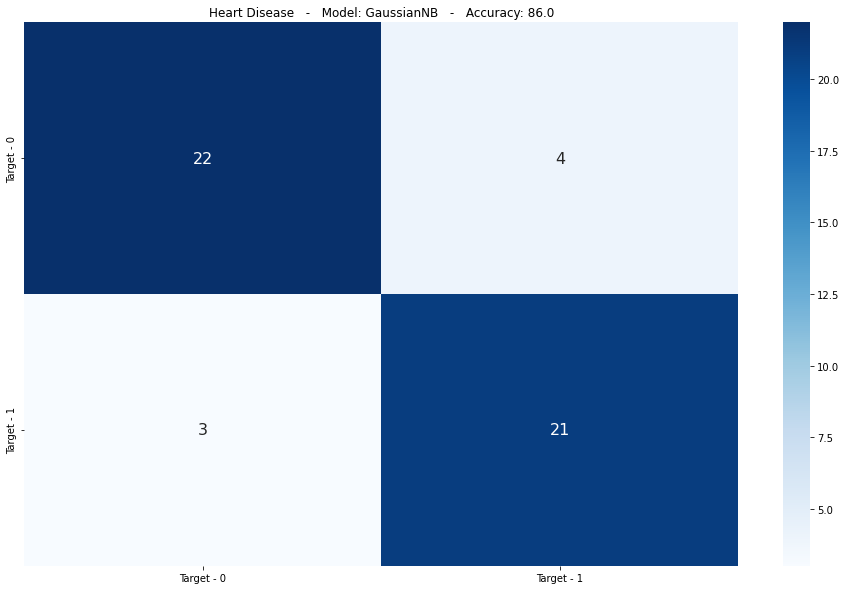

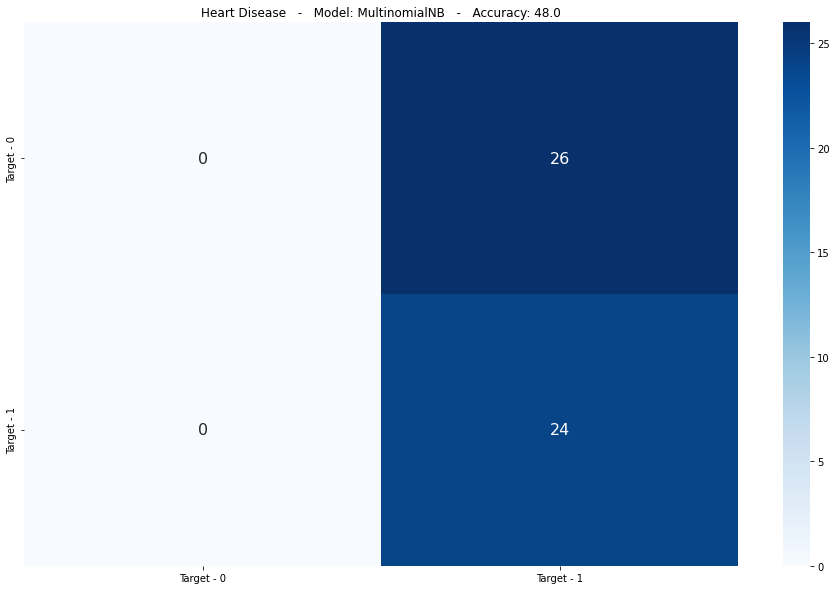

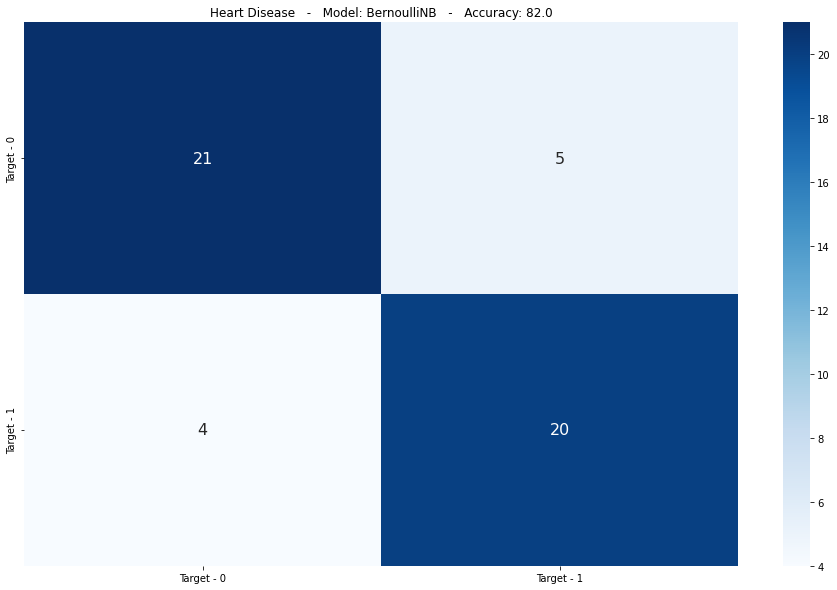

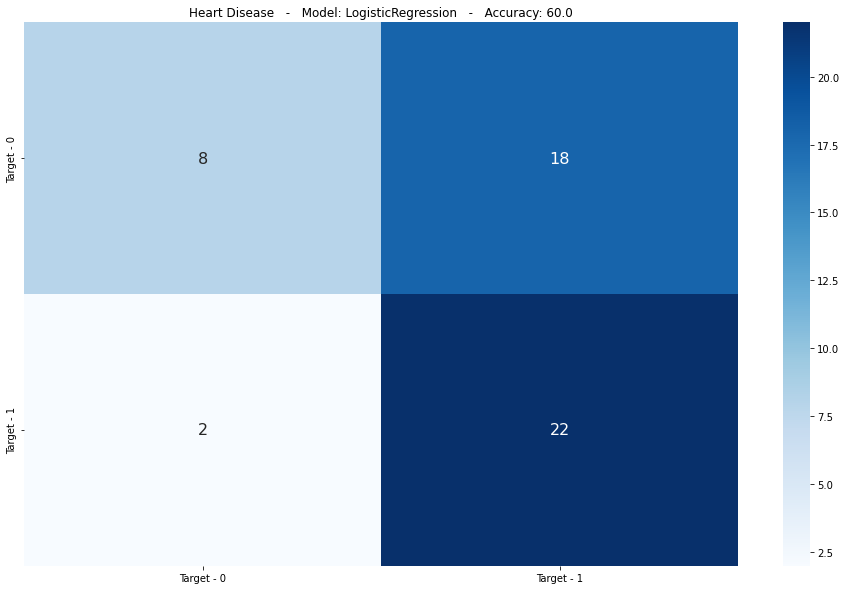

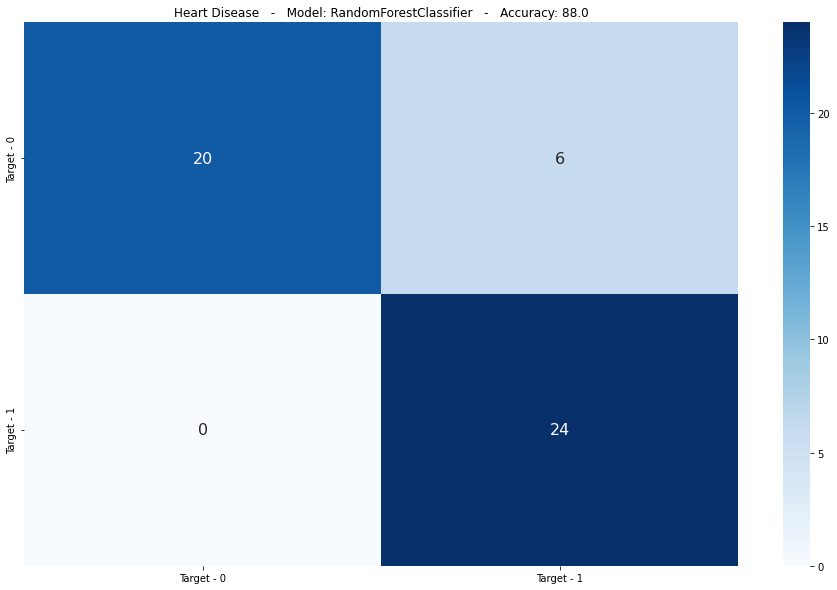

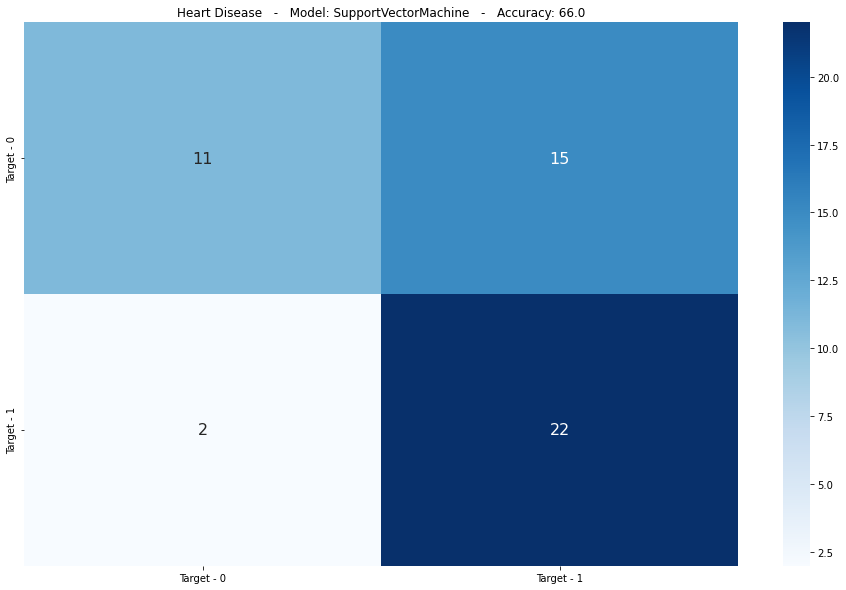

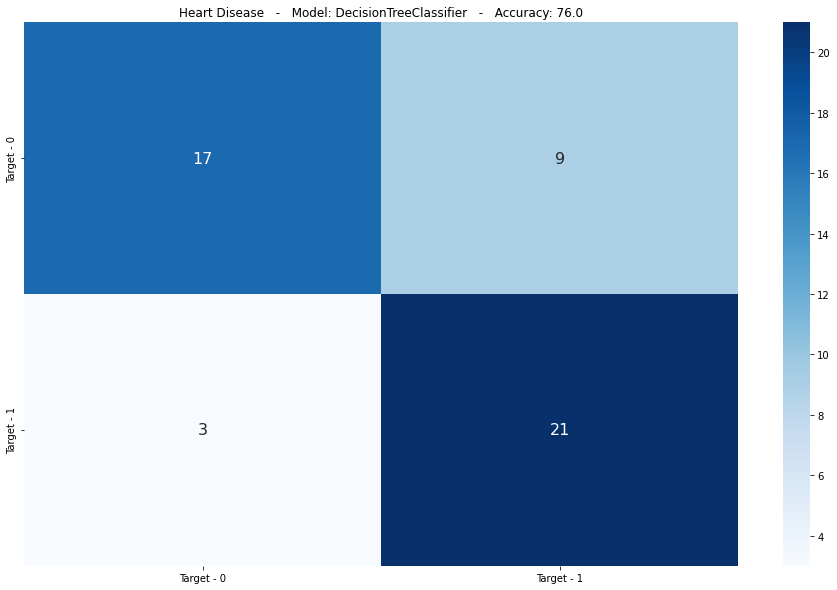

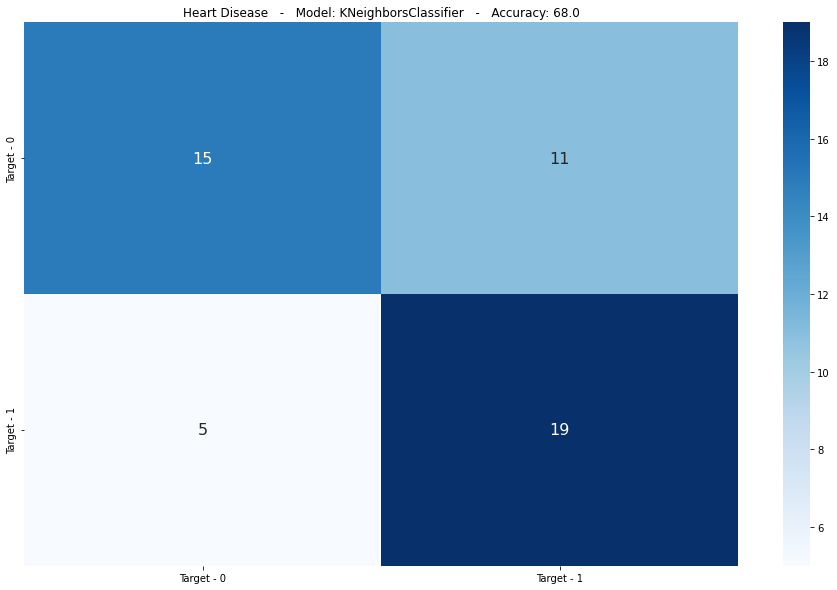

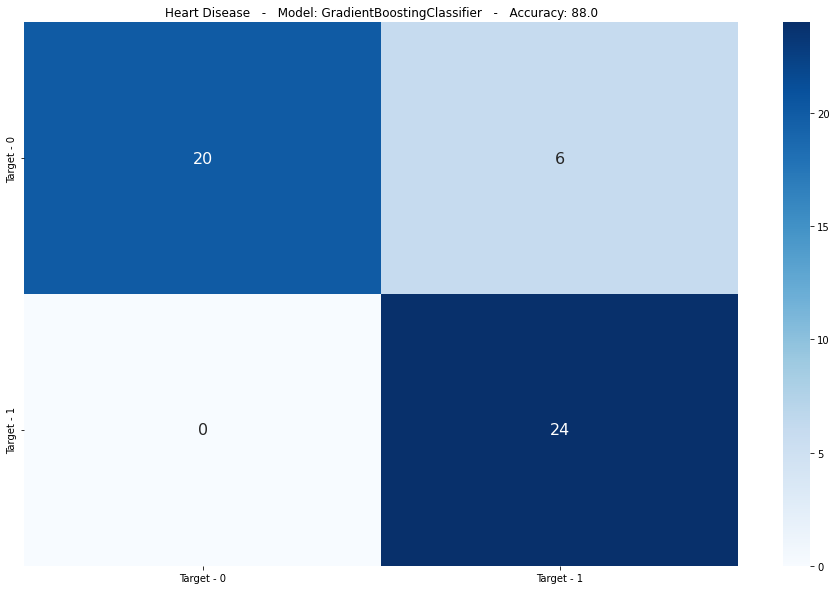

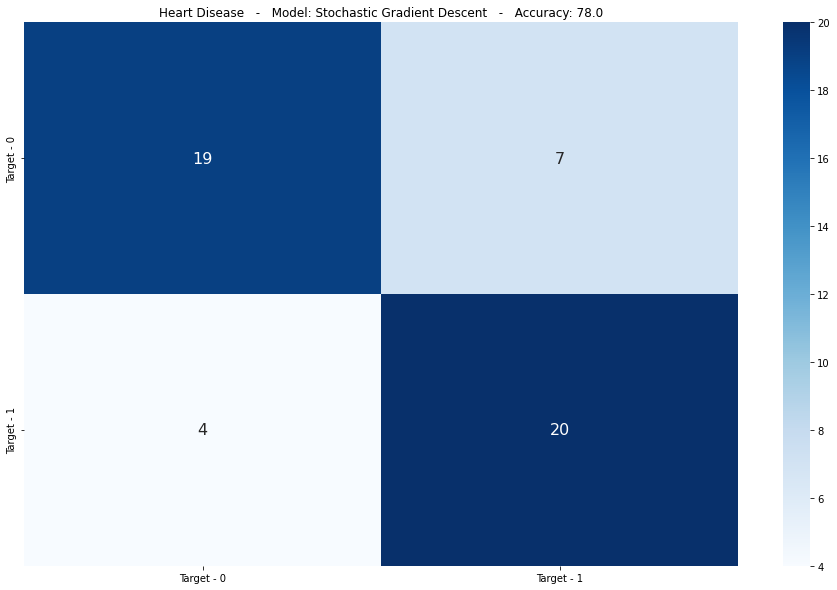

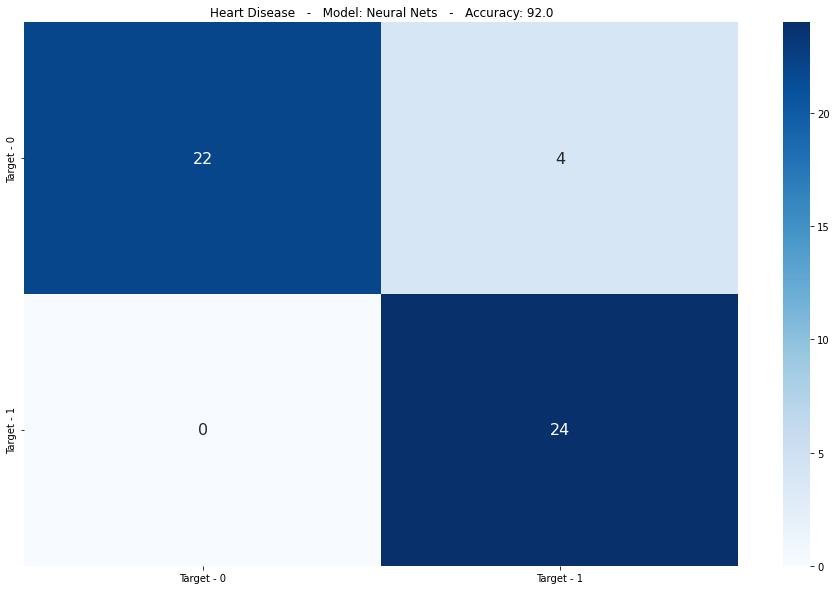

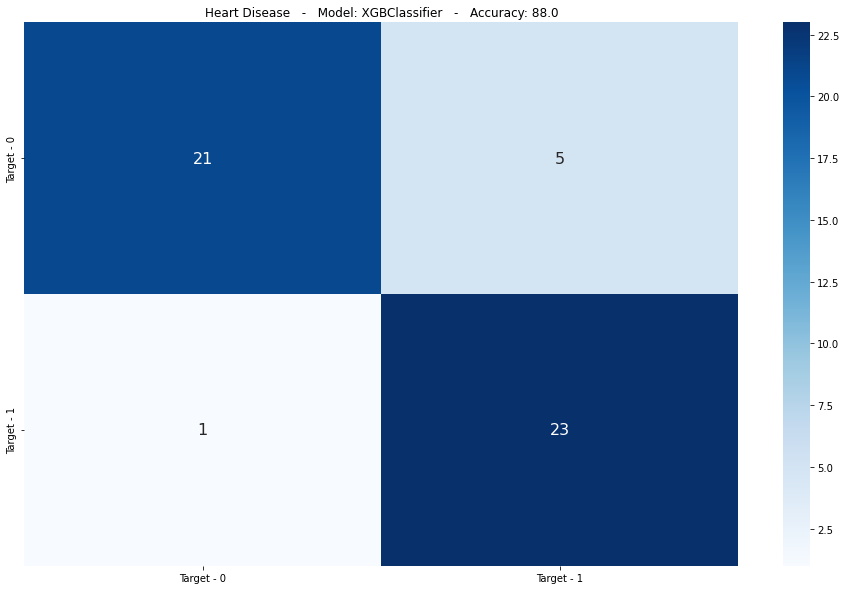

In [ ]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  plt.figure(figsize = (16,10))
  plt.title(f'Heart Disease   -   Model: {current}   -   Accuracy: {test_score*100}')
  sns.heatmap(confusion_matr, cmap="Blues", annot=True, annot_kws={"size": 16},
              xticklabels = ['Target - 0', 'Target - 1'],
             yticklabels=['Target - 0', 'Target - 1']);
  #plt.savefig(f'{current}.jpg')
  print("############################################################################")
  print("")
  print("")
  print("")

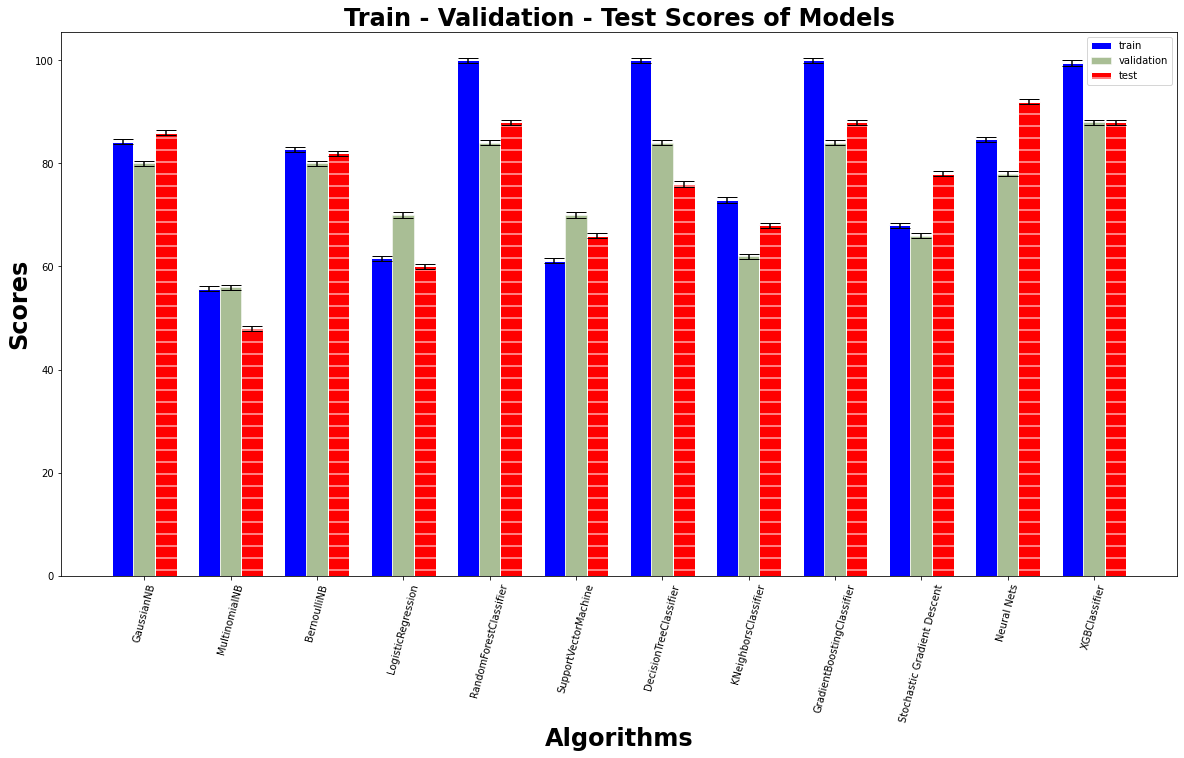

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

Graf prikazuje rezultate algoritama u setovima za uvježbavanje, validaciju i testiranje

In [ ]:
for i in range(12):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 86.0
Accuracy of MultinomialNB -----> 48.0
Accuracy of BernoulliNB -----> 82.0
Accuracy of LogisticRegression -----> 60.0
Accuracy of RandomForestClassifier -----> 88.0
Accuracy of SupportVectorMachine -----> 66.0
Accuracy of DecisionTreeClassifier -----> 76.0
Accuracy of KNeighborsClassifier -----> 68.0
Accuracy of GradientBoostingClassifier -----> 88.0
Accuracy of Stochastic Gradient Descent -----> 78.0
Accuracy of Neural Nets -----> 92.0
Accuracy of XGBClassifier -----> 88.0


Vidljivo je da su se kao najboji algoritmi pokazali MLPClassifier,Gaussian Naive Bayes kao i algoritmi koji koriste stabla odluke među kojima GradientBoostingClassifier,XGBClassifier i RandomForestClassifier.